In [1]:
import pandas as pd
import numpy as np
from dwave.system import DWaveSampler
import matplotlib.pyplot as plt

data = pd.read_excel('./annealing_schedule.xlsx',  sheet_name='processor-annealing-schedule') 
s_vals = pd.DataFrame(data, columns=['s'])
A_vals = pd.DataFrame(data, columns=['A(s) (GHz)'])
B_vals = pd.DataFrame(data, columns=['B(s) (GHz)'])
cs_vals = pd.DataFrame(data, columns=['C (normalized)'])
first_s = s_vals.to_numpy().flatten()
first_A = A_vals.to_numpy().flatten()
first_B = B_vals.to_numpy().flatten()
first_c = cs_vals.to_numpy().flatten()

In [2]:
# f1 = open("token.txt", "r")
f2 = open("../paid_token.txt", "r")
# freetoken=f1.read()
paidtoken=f2.read()

#sampler = DWaveSampler(solver=dict(topology__type='zephyr'),token=freetoken)
sampler = DWaveSampler(solver=dict(topology__type='zephyr'),token=paidtoken)

print("QPU {} was selected.".format(sampler.solver.name))

QPU Advantage2_prototype1.1 was selected.


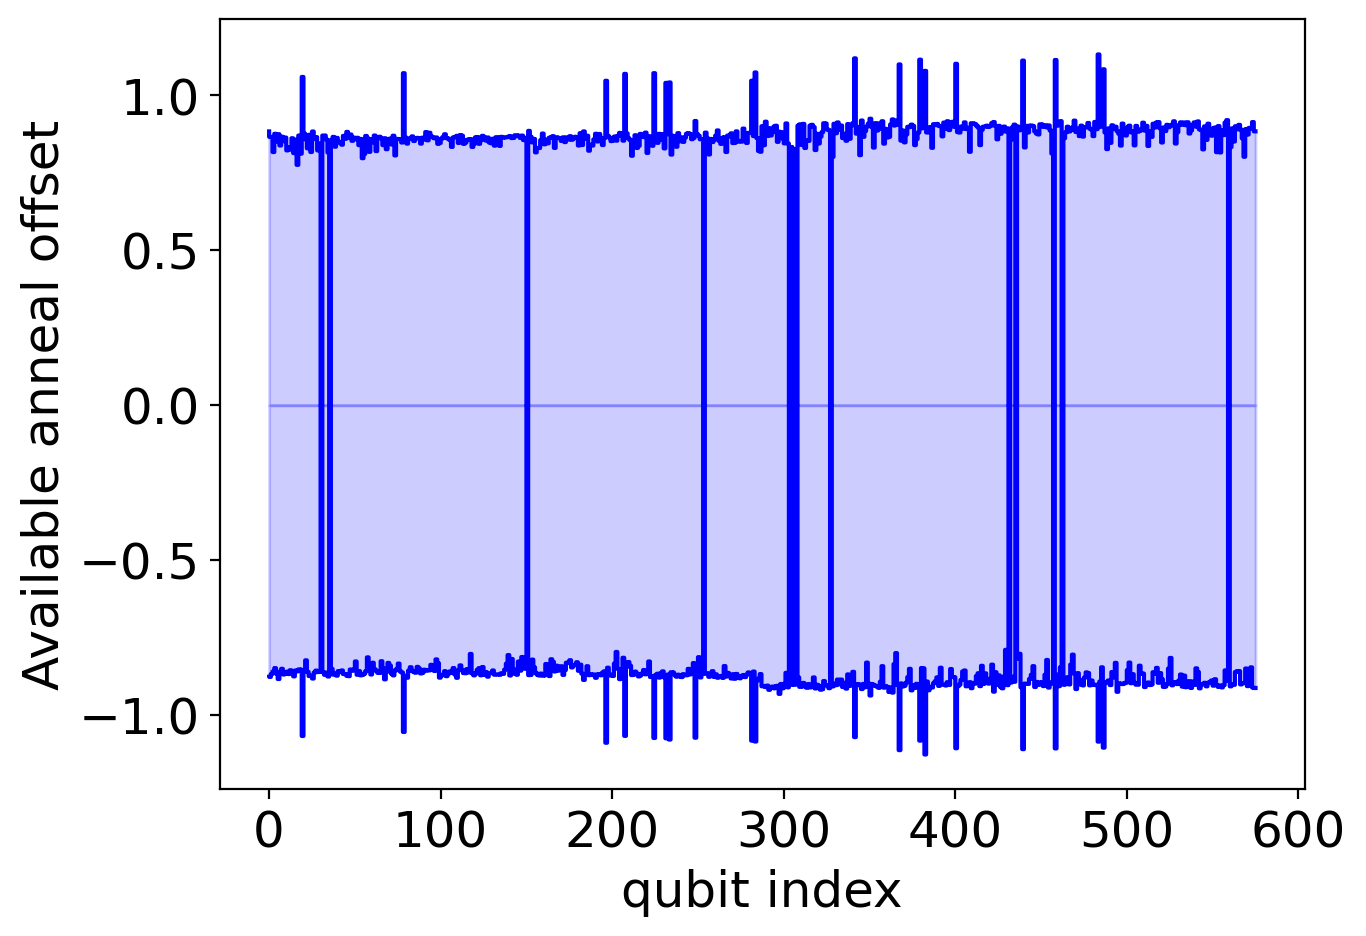

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))

offsets = np.array(sampler.properties["anneal_offset_ranges"])
# plt.plot(offsets[:,0], color = 'black')
# plt.plot(offsets[:,1], color = 'black')
plt.fill_between(range(sampler.properties["num_qubits"]), offsets[:,0], step="pre", alpha=0.2, color = 'blue')
plt.fill_between(range(sampler.properties["num_qubits"]), offsets[:,1], step="pre", alpha=0.2, color = 'blue')

plt.plot(range(sampler.properties["num_qubits"]), offsets[:,0], drawstyle="steps", color = 'blue')
plt.plot(range(sampler.properties["num_qubits"]), offsets[:,1], drawstyle="steps", color = 'blue')
plt.xlabel('qubit index')
plt.ylabel('Available anneal offset')
plt.show()

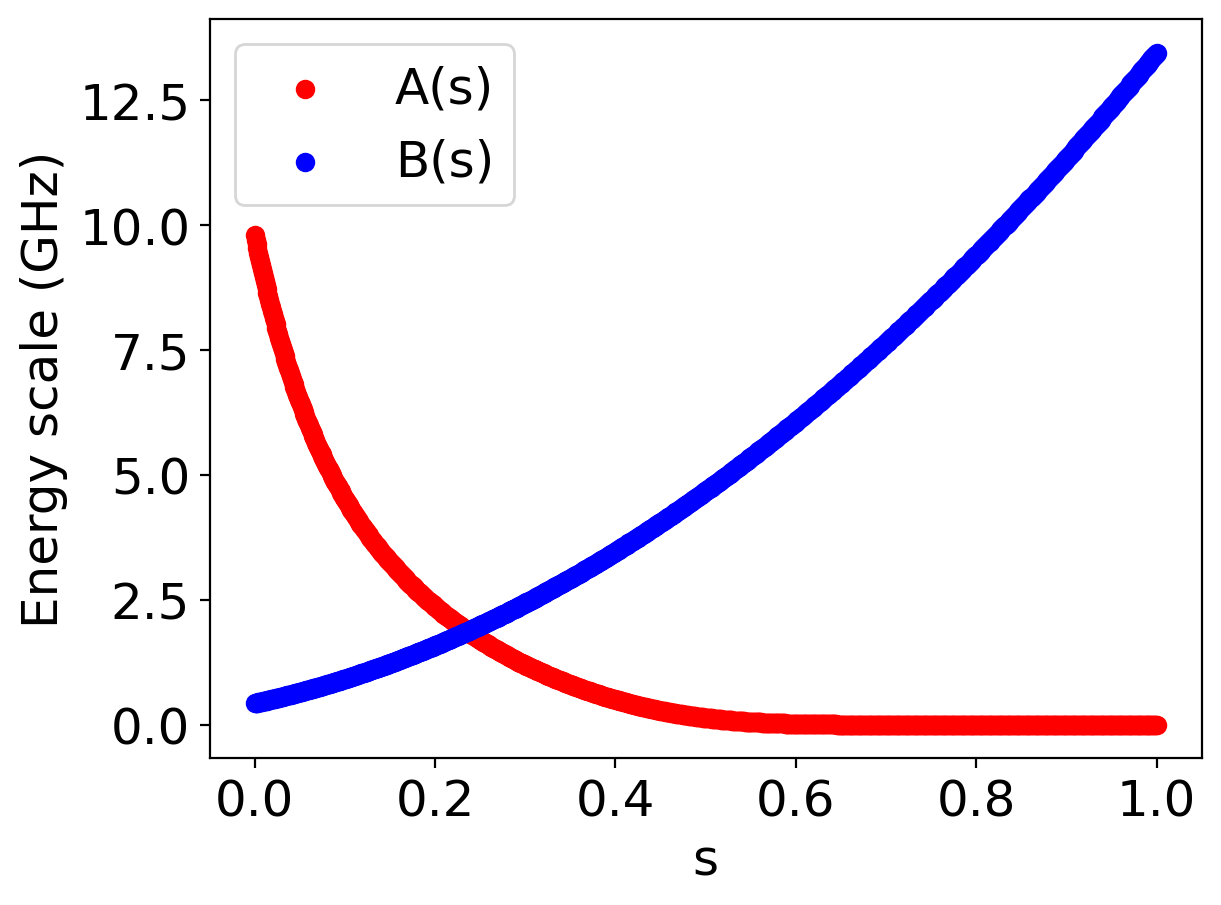

In [4]:
# plot
fig, ax = plt.subplots()

ax.scatter(first_s, first_A, c = 'red', label='A(s)')
ax.scatter(first_s, first_B, c = 'blue', label='B(s)')

plt.ylabel('Energy scale (GHz)')
plt.xlabel('s')

plt.legend()

plt.show()

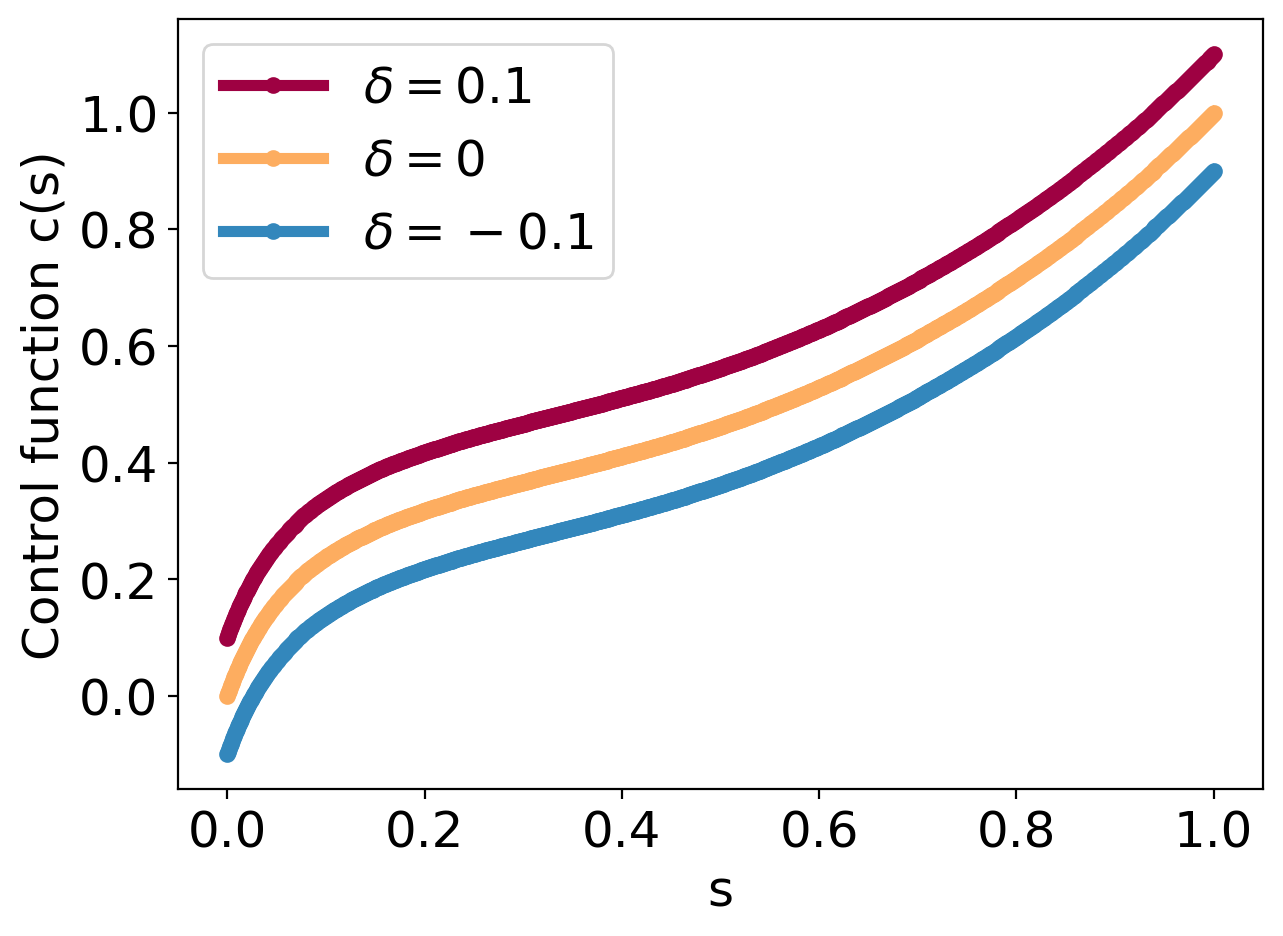

In [5]:

# plot
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))


cmap = plt.colormaps['Spectral']


plt.plot(first_s, first_c + 0.1, label=r'$\delta = 0.1$', color = cmap(0), marker = 'o', ms = 5, linewidth = 4)
plt.plot(first_s, first_c, label=r'$\delta = 0$', color = cmap(0.3), marker = 'o', ms = 5, linewidth = 4)
plt.plot(first_s, first_c - 0.1, label=r'$\delta = -0.1$', color = cmap(0.9), marker = 'o', ms = 5, linewidth = 4)


plt.ylabel('Control function c(s)')
plt.xlabel('s')

plt.legend()

plt.show()

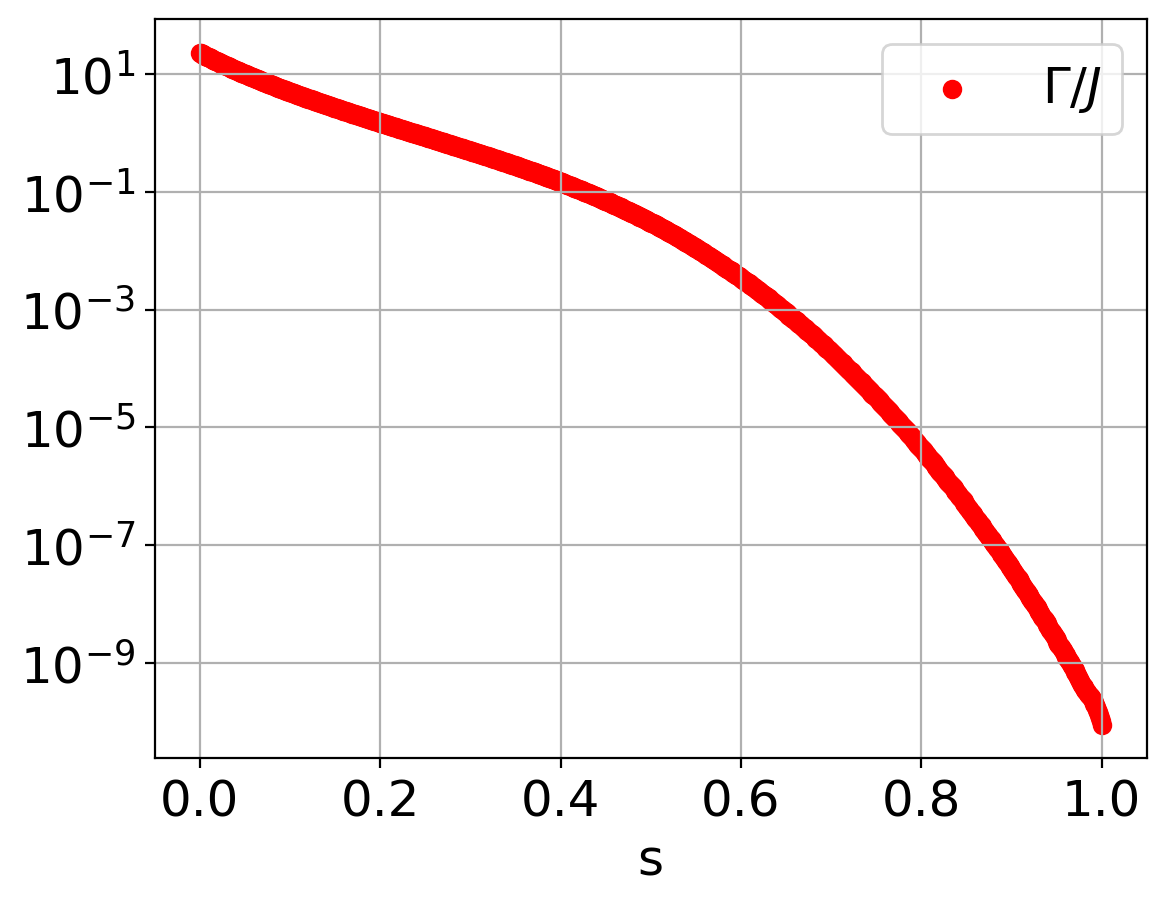

In [6]:
import matplotlib.pyplot as plt


# plot
fig, ax = plt.subplots()

ax.scatter(first_s, np.divide(first_A, first_B), c = 'red', label=r'$\Gamma/J$')
#ax.scatter(new_s, new_B, c = 'blue', label='B(s)')

plt.xlabel('s')
plt.yscale('log')
plt.legend()
plt.grid('on')
plt.show()

In [7]:
#A^2/B
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


#finer s grid
new_s = np.linspace(0,1,num = 100*len(first_s))
new_A = np.interp(new_s, first_s, first_A)
new_B = np.interp(new_s, first_s, first_B)
new_c = np.interp(new_s, first_s, first_c)

A2divB = np.divide(new_A**2,2*new_B)
A3divB2 = np.divide(new_A**3,new_B**2)
# A3divB2 = np.divide(new_A**2,new_B)

indices = len(new_A)*np.ones(len(new_A),dtype=np.int8)
delta_c = np.zeros(len(new_A))
delta_c_3 = np.zeros(len(new_A))
differences = np.zeros(len(new_A))

for i in range(len(new_A)):
    val = find_nearest(A2divB, value = new_A[i])
    val_3 = find_nearest(A3divB2, value = new_A[i])
    differences[i]= A2divB[val] - new_A[i]
    indices[i] = val
    delta_c[i] = new_c[val] - new_c[i] 
    delta_c_3[i] = new_c[val_3] - new_c[i] 


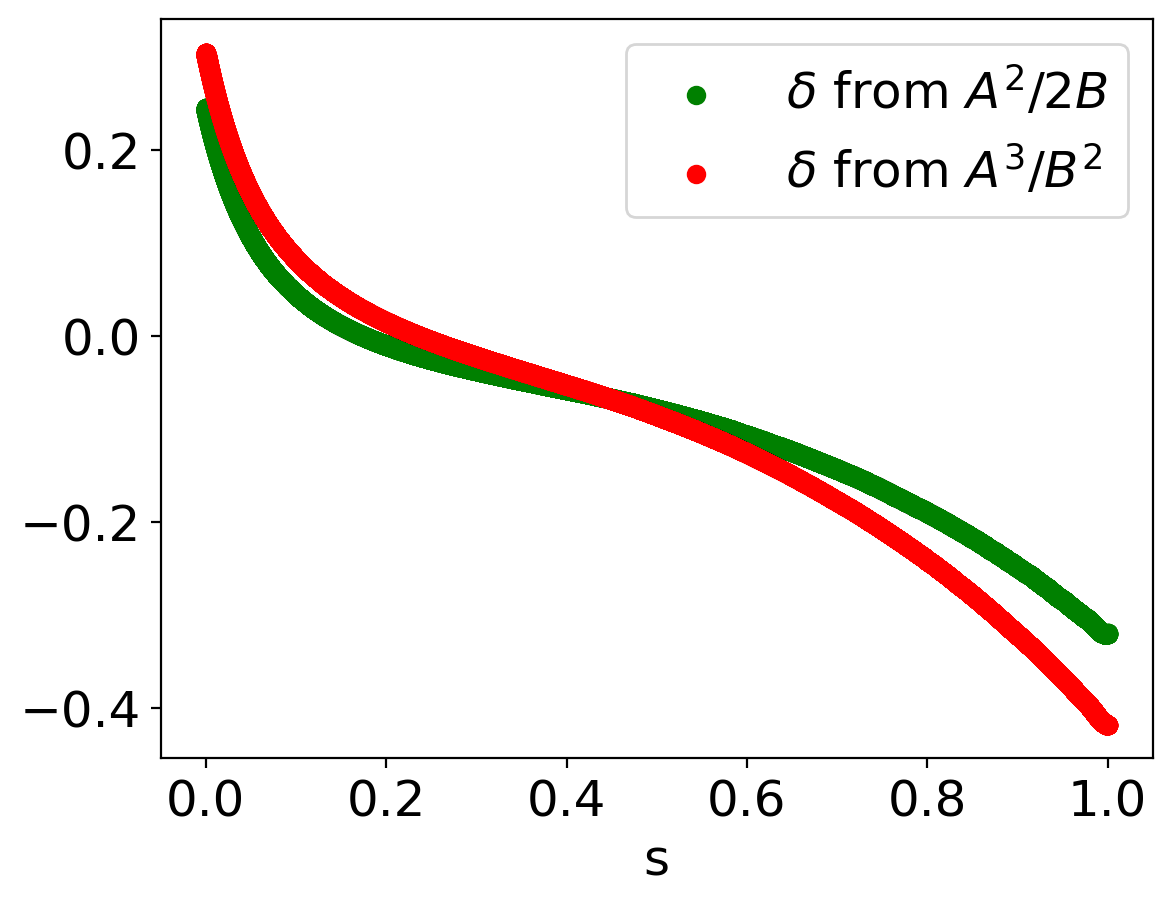

In [8]:
fig, ax = plt.subplots()

ax.scatter(new_s, delta_c, c = 'green', label = r'$\delta$ from $A^2/2B$')
ax.scatter(new_s, delta_c_3, c = 'red', label = r'$\delta$ from $A^3/B^2$')

plt.xlabel('s')
#plt.yscale('log')
plt.legend()

plt.show()

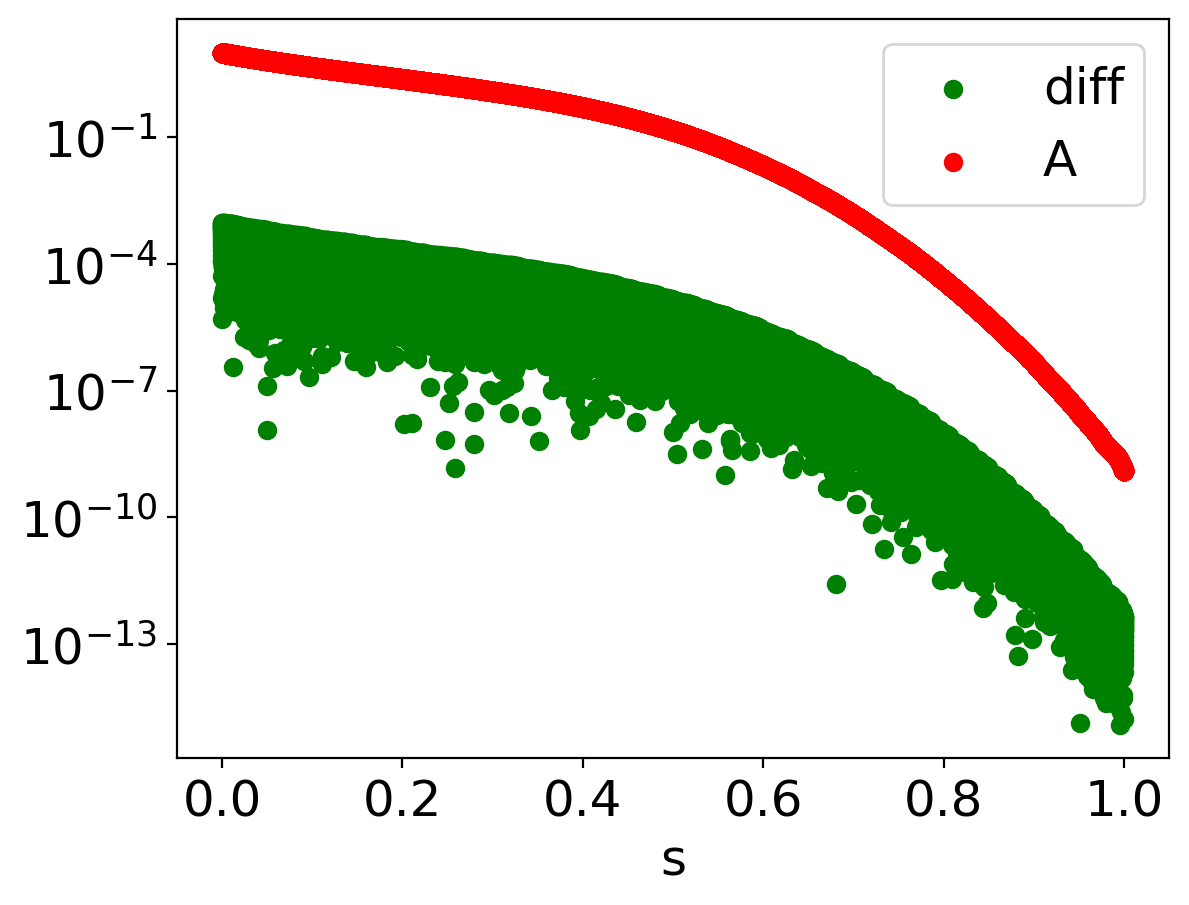

In [9]:
fig, ax = plt.subplots()

ax.scatter(new_s, differences, c = 'green', label = 'diff')
ax.scatter(new_s, new_A, c = 'red', label = 'A')

plt.xlabel('s')
plt.yscale('log')
plt.legend()

plt.show()

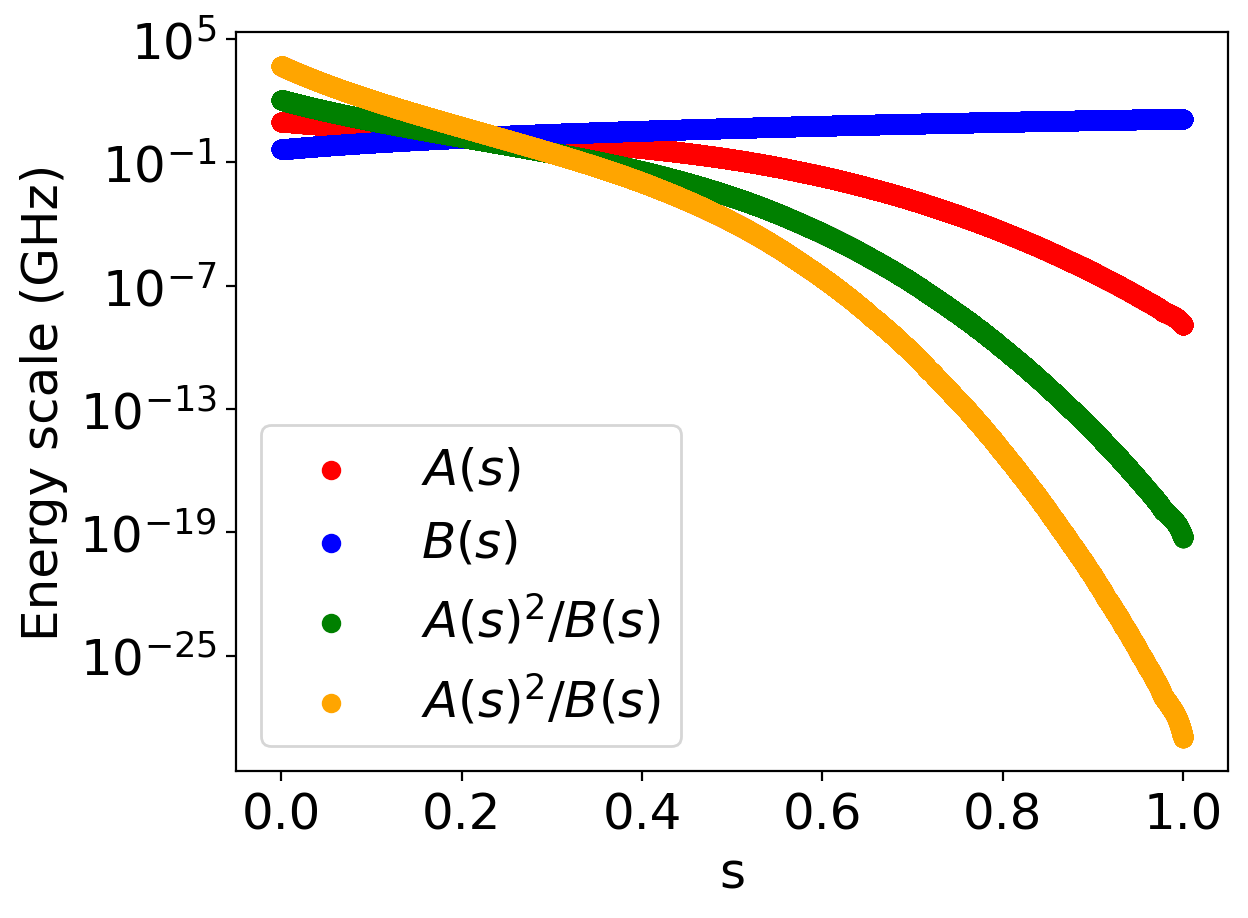

In [10]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_A, c = 'red', label=r'$A(s)$')
ax.scatter(new_s, new_B, c = 'blue', label=r'$B(s)$')
ax.scatter(new_s, A2divB, c = 'green', label=r'$A(s)^2/B(s)$')
ax.scatter(new_s, A3divB2, c = 'orange', label=r'$A(s)^2/B(s)$')



plt.ylabel('Energy scale (GHz)')
plt.xlabel('s')
plt.yscale('log')
plt.legend()

plt.show()

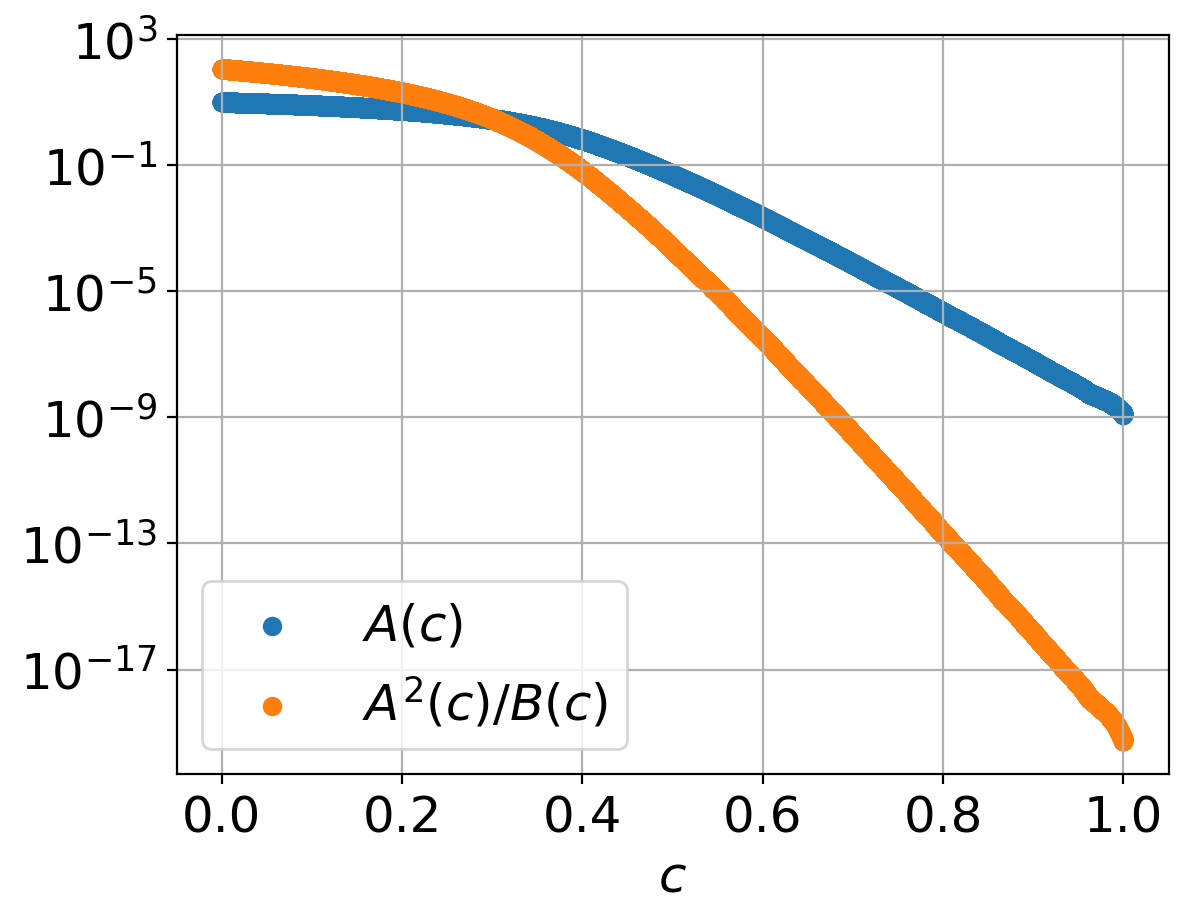

In [11]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_c, new_A, label=r"$A(c)$")
ax.scatter(new_c, A2divB,  label=r"$A^2(c)/B(c)$")
plt.xlabel(r'$c$')
plt.legend()
#plt.ylabel(r'$\delta c_2$')
ax.set_yscale('log')
plt.grid()
plt.show()

<Figure size 6000x1920 with 0 Axes>

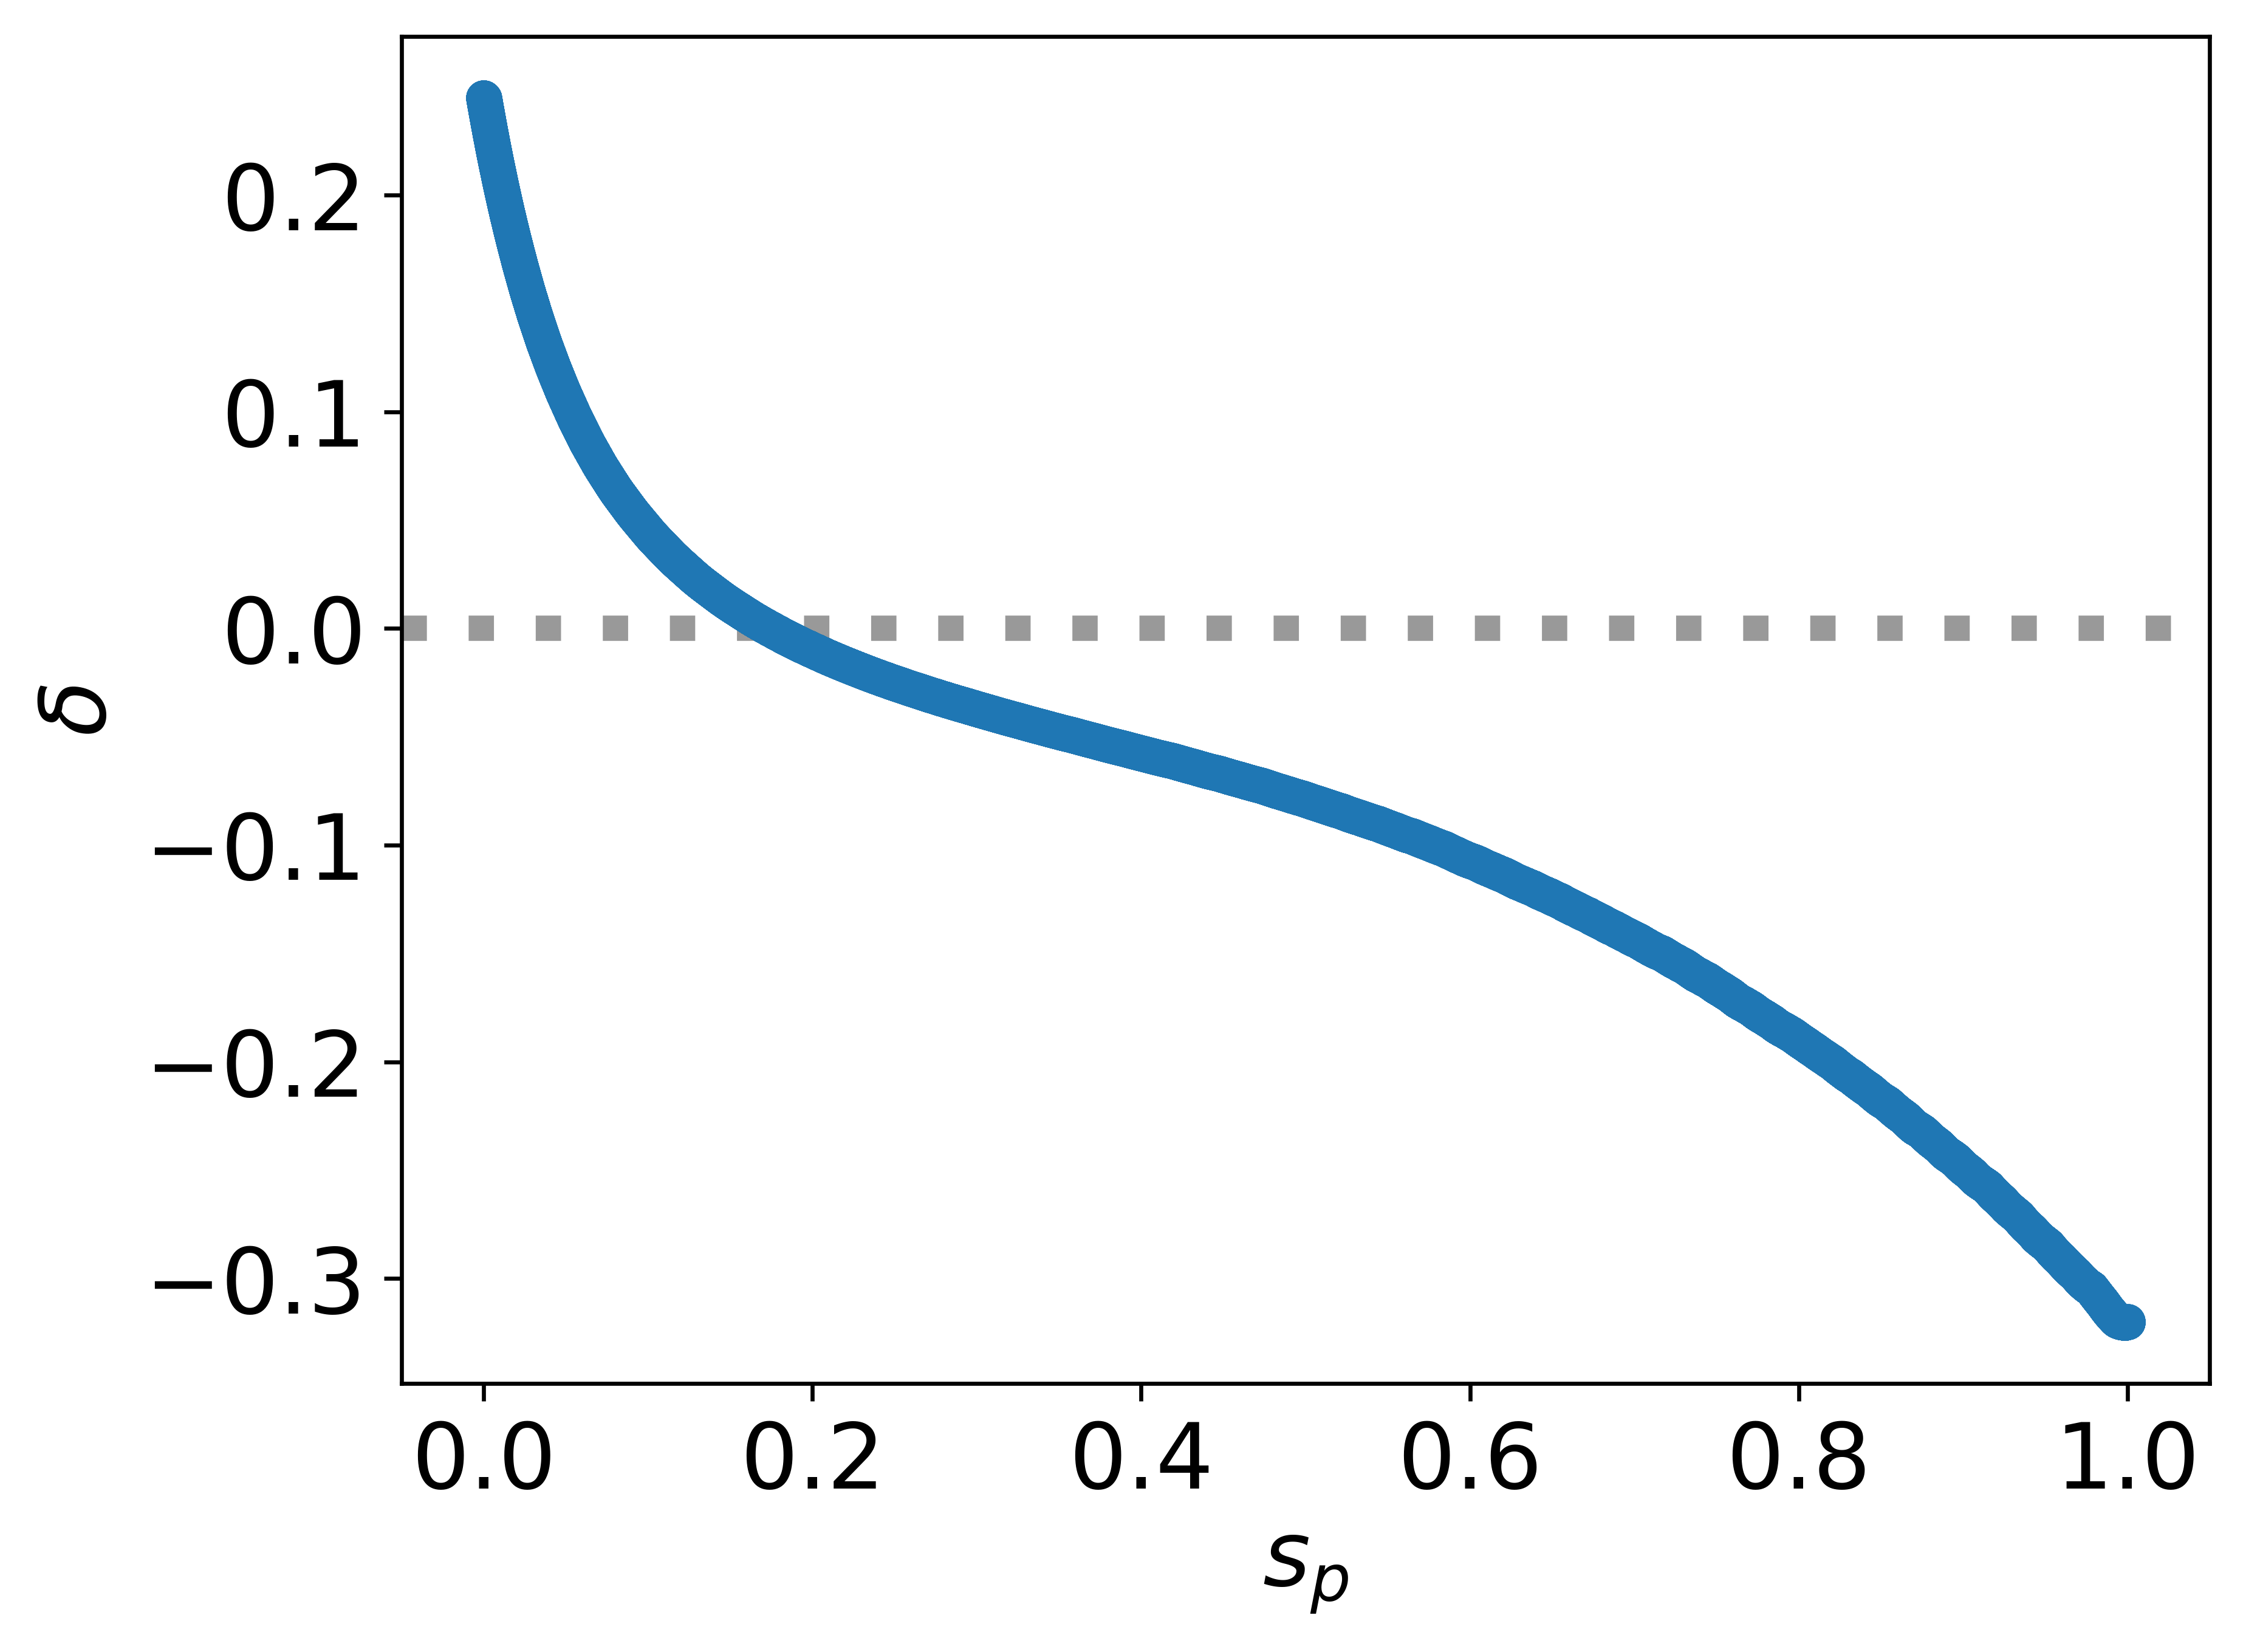

In [12]:
# plot
plt.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(10,3.2))

fig, ax = plt.subplots()
plt.axhline(y=0, color='black', linestyle='dotted', alpha=0.4, lw=5)  # Extend horizontal line across the plots
ax.scatter(new_s, delta_c, zorder = 10)
plt.xlabel(r'$s_{p}$')
plt.ylabel(r'$\delta$')
# plt.grid()
plt.show()

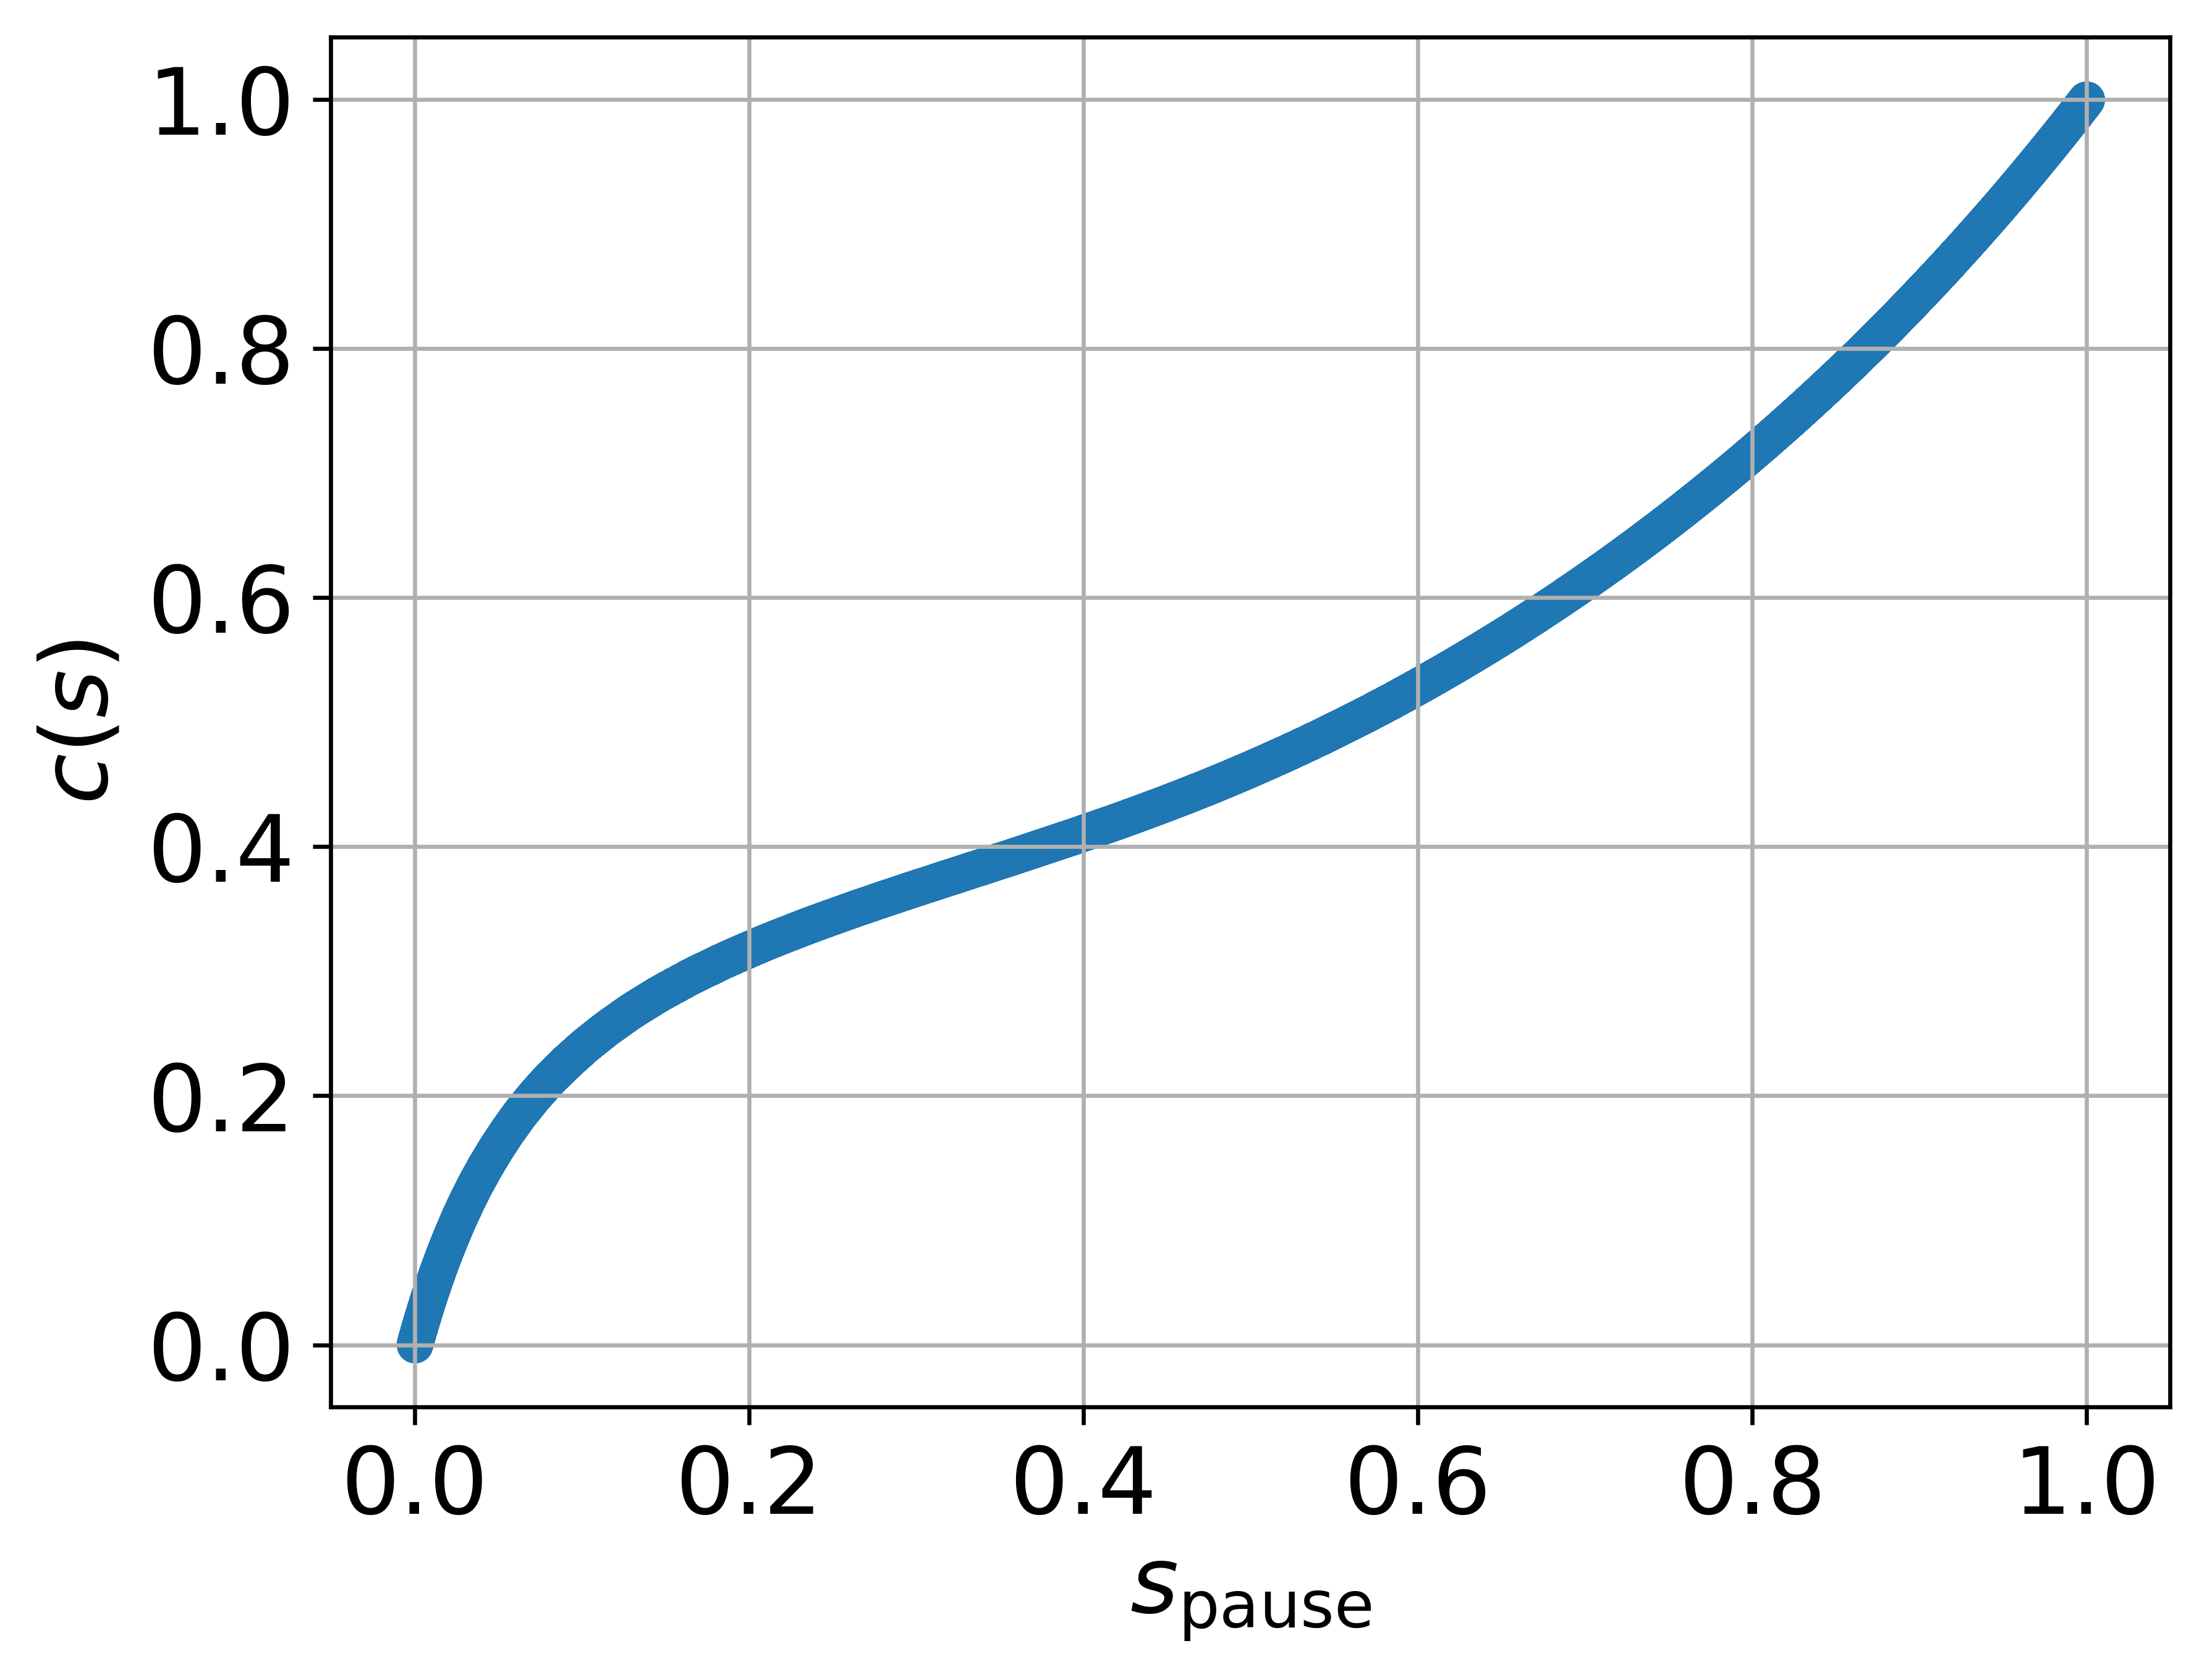

In [13]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_c)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$c(s)$')
plt.grid()
plt.show()

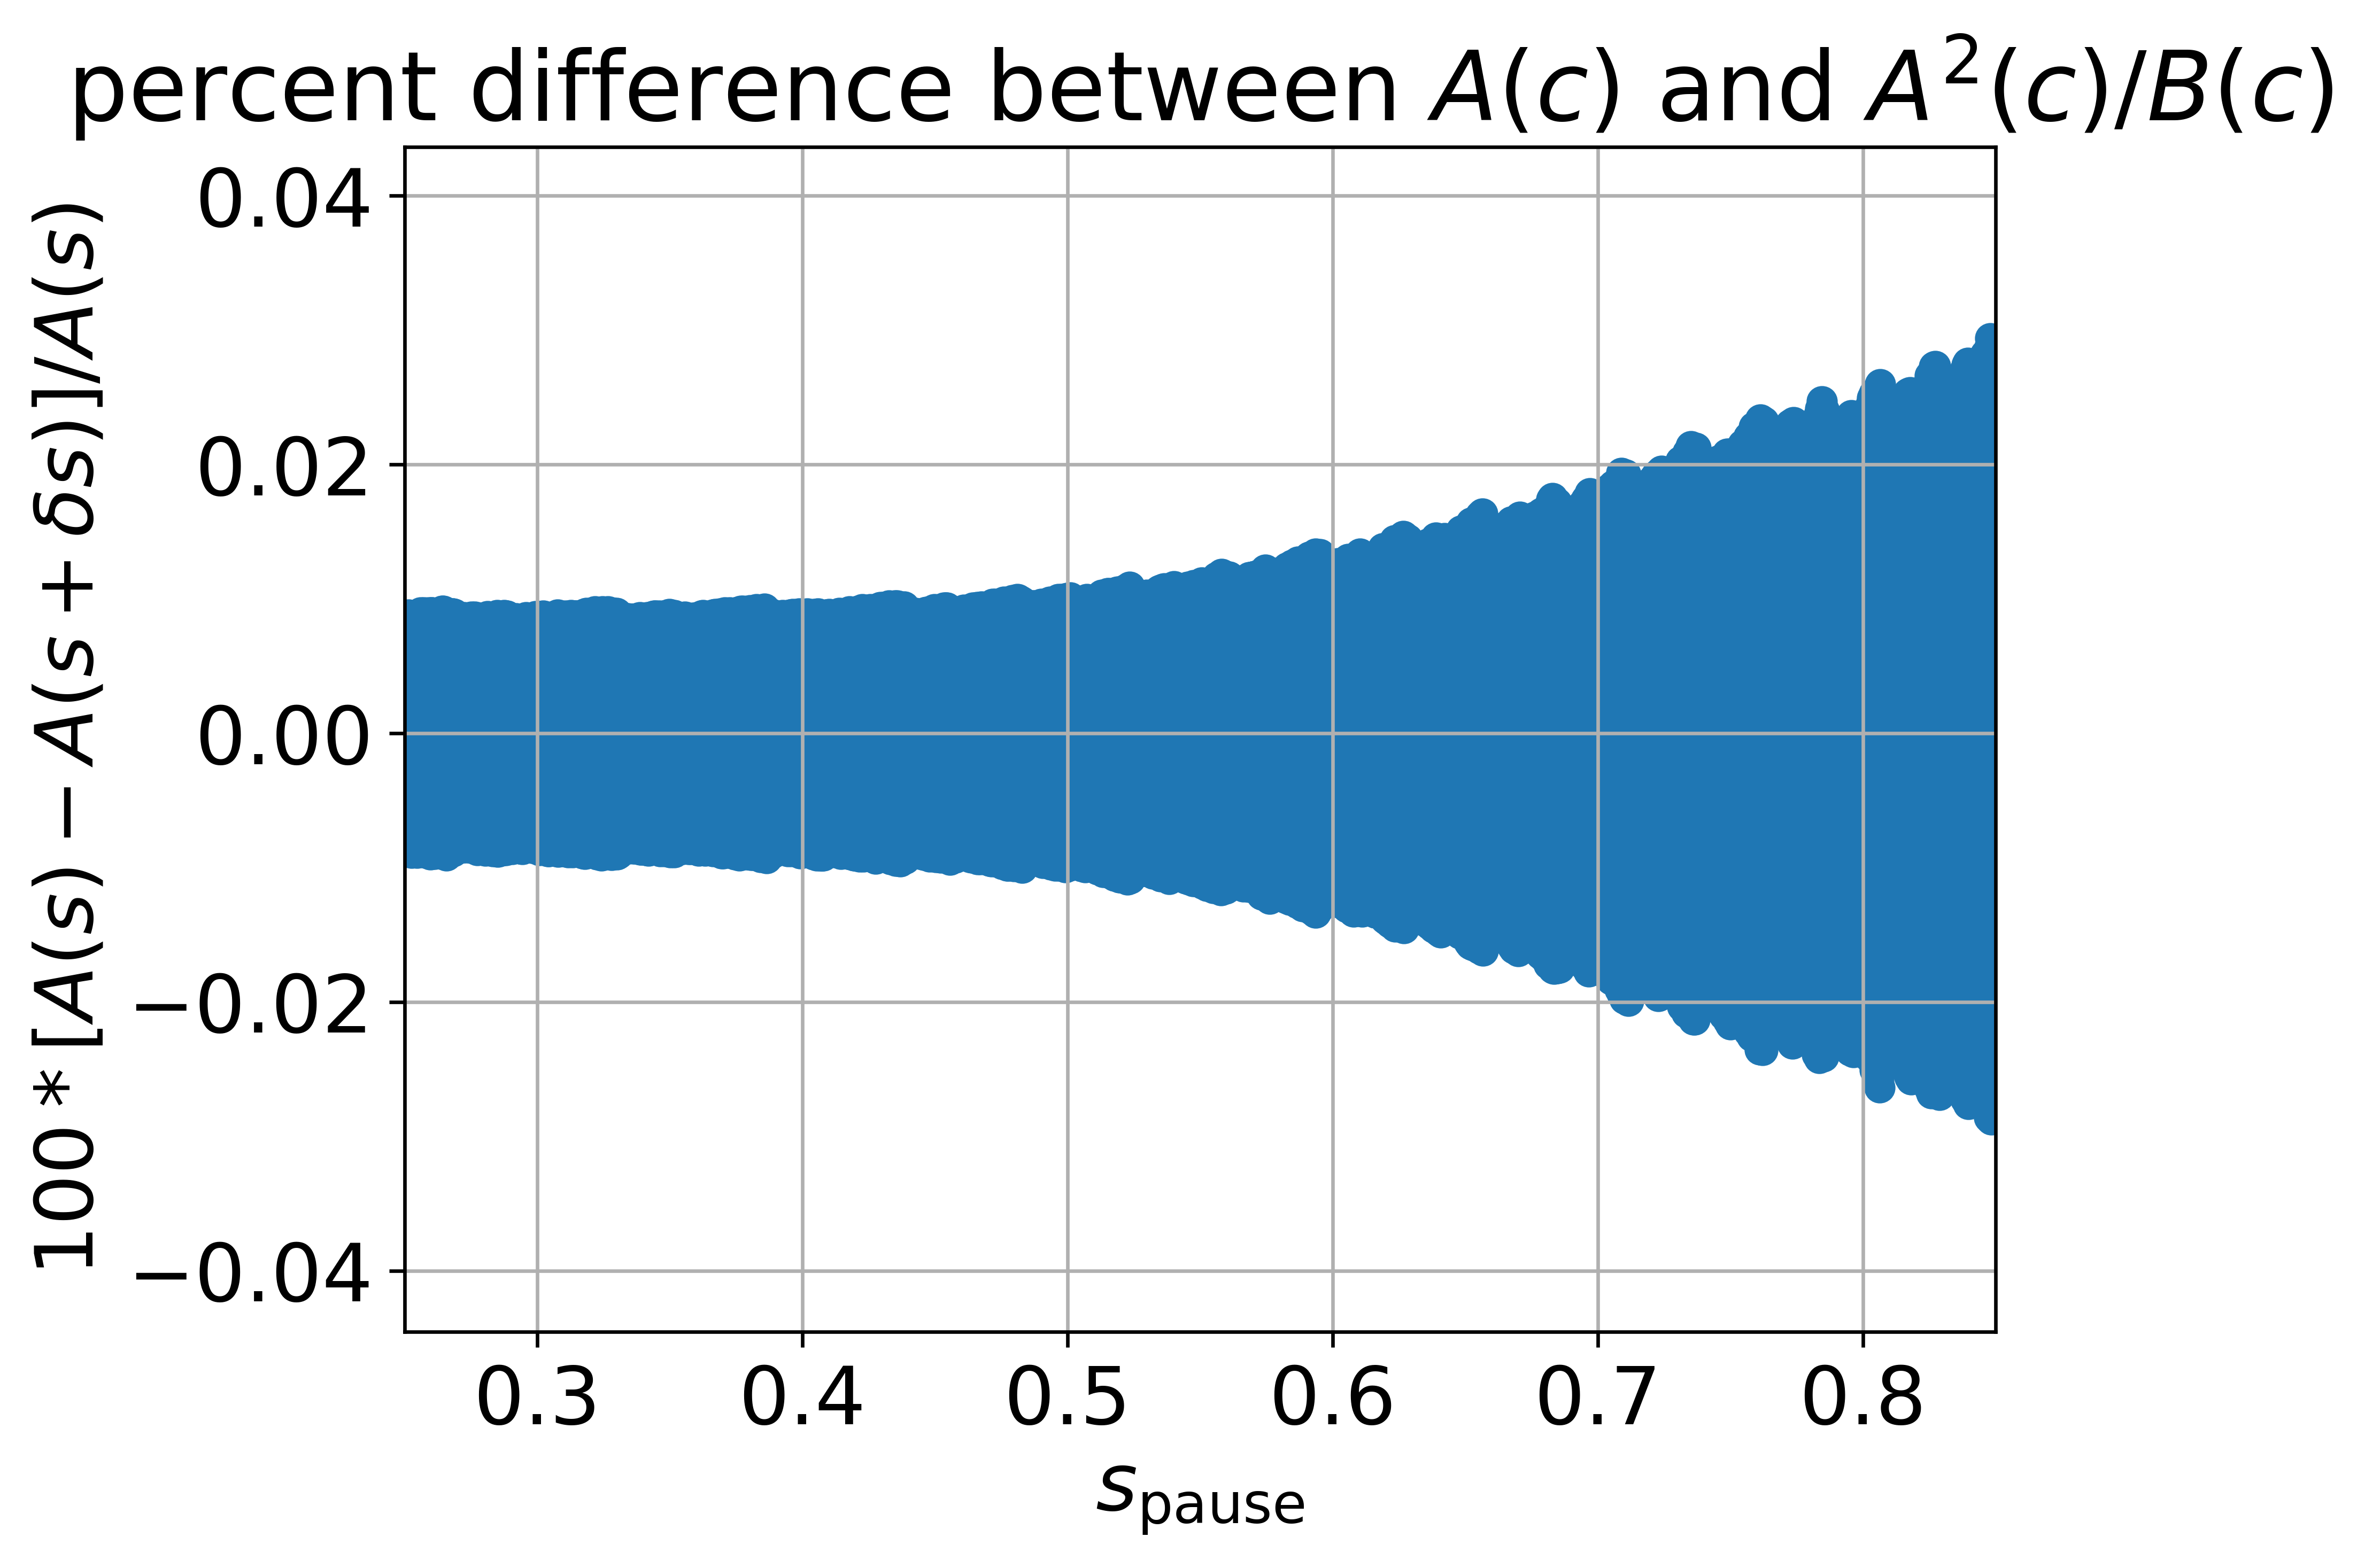

In [14]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, 100*np.divide(differences, new_A))
#ax.scatter(new_s, differences)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$100*[A(s) - A(s + \delta s)]/A(s)$')
plt.xlim([0.25, 0.85])
#plt.ylim([-50, 50])
plt.title(r"percent difference between $A(c)$ and $A^2(c)/B(c)$")
plt.grid()
plt.show()

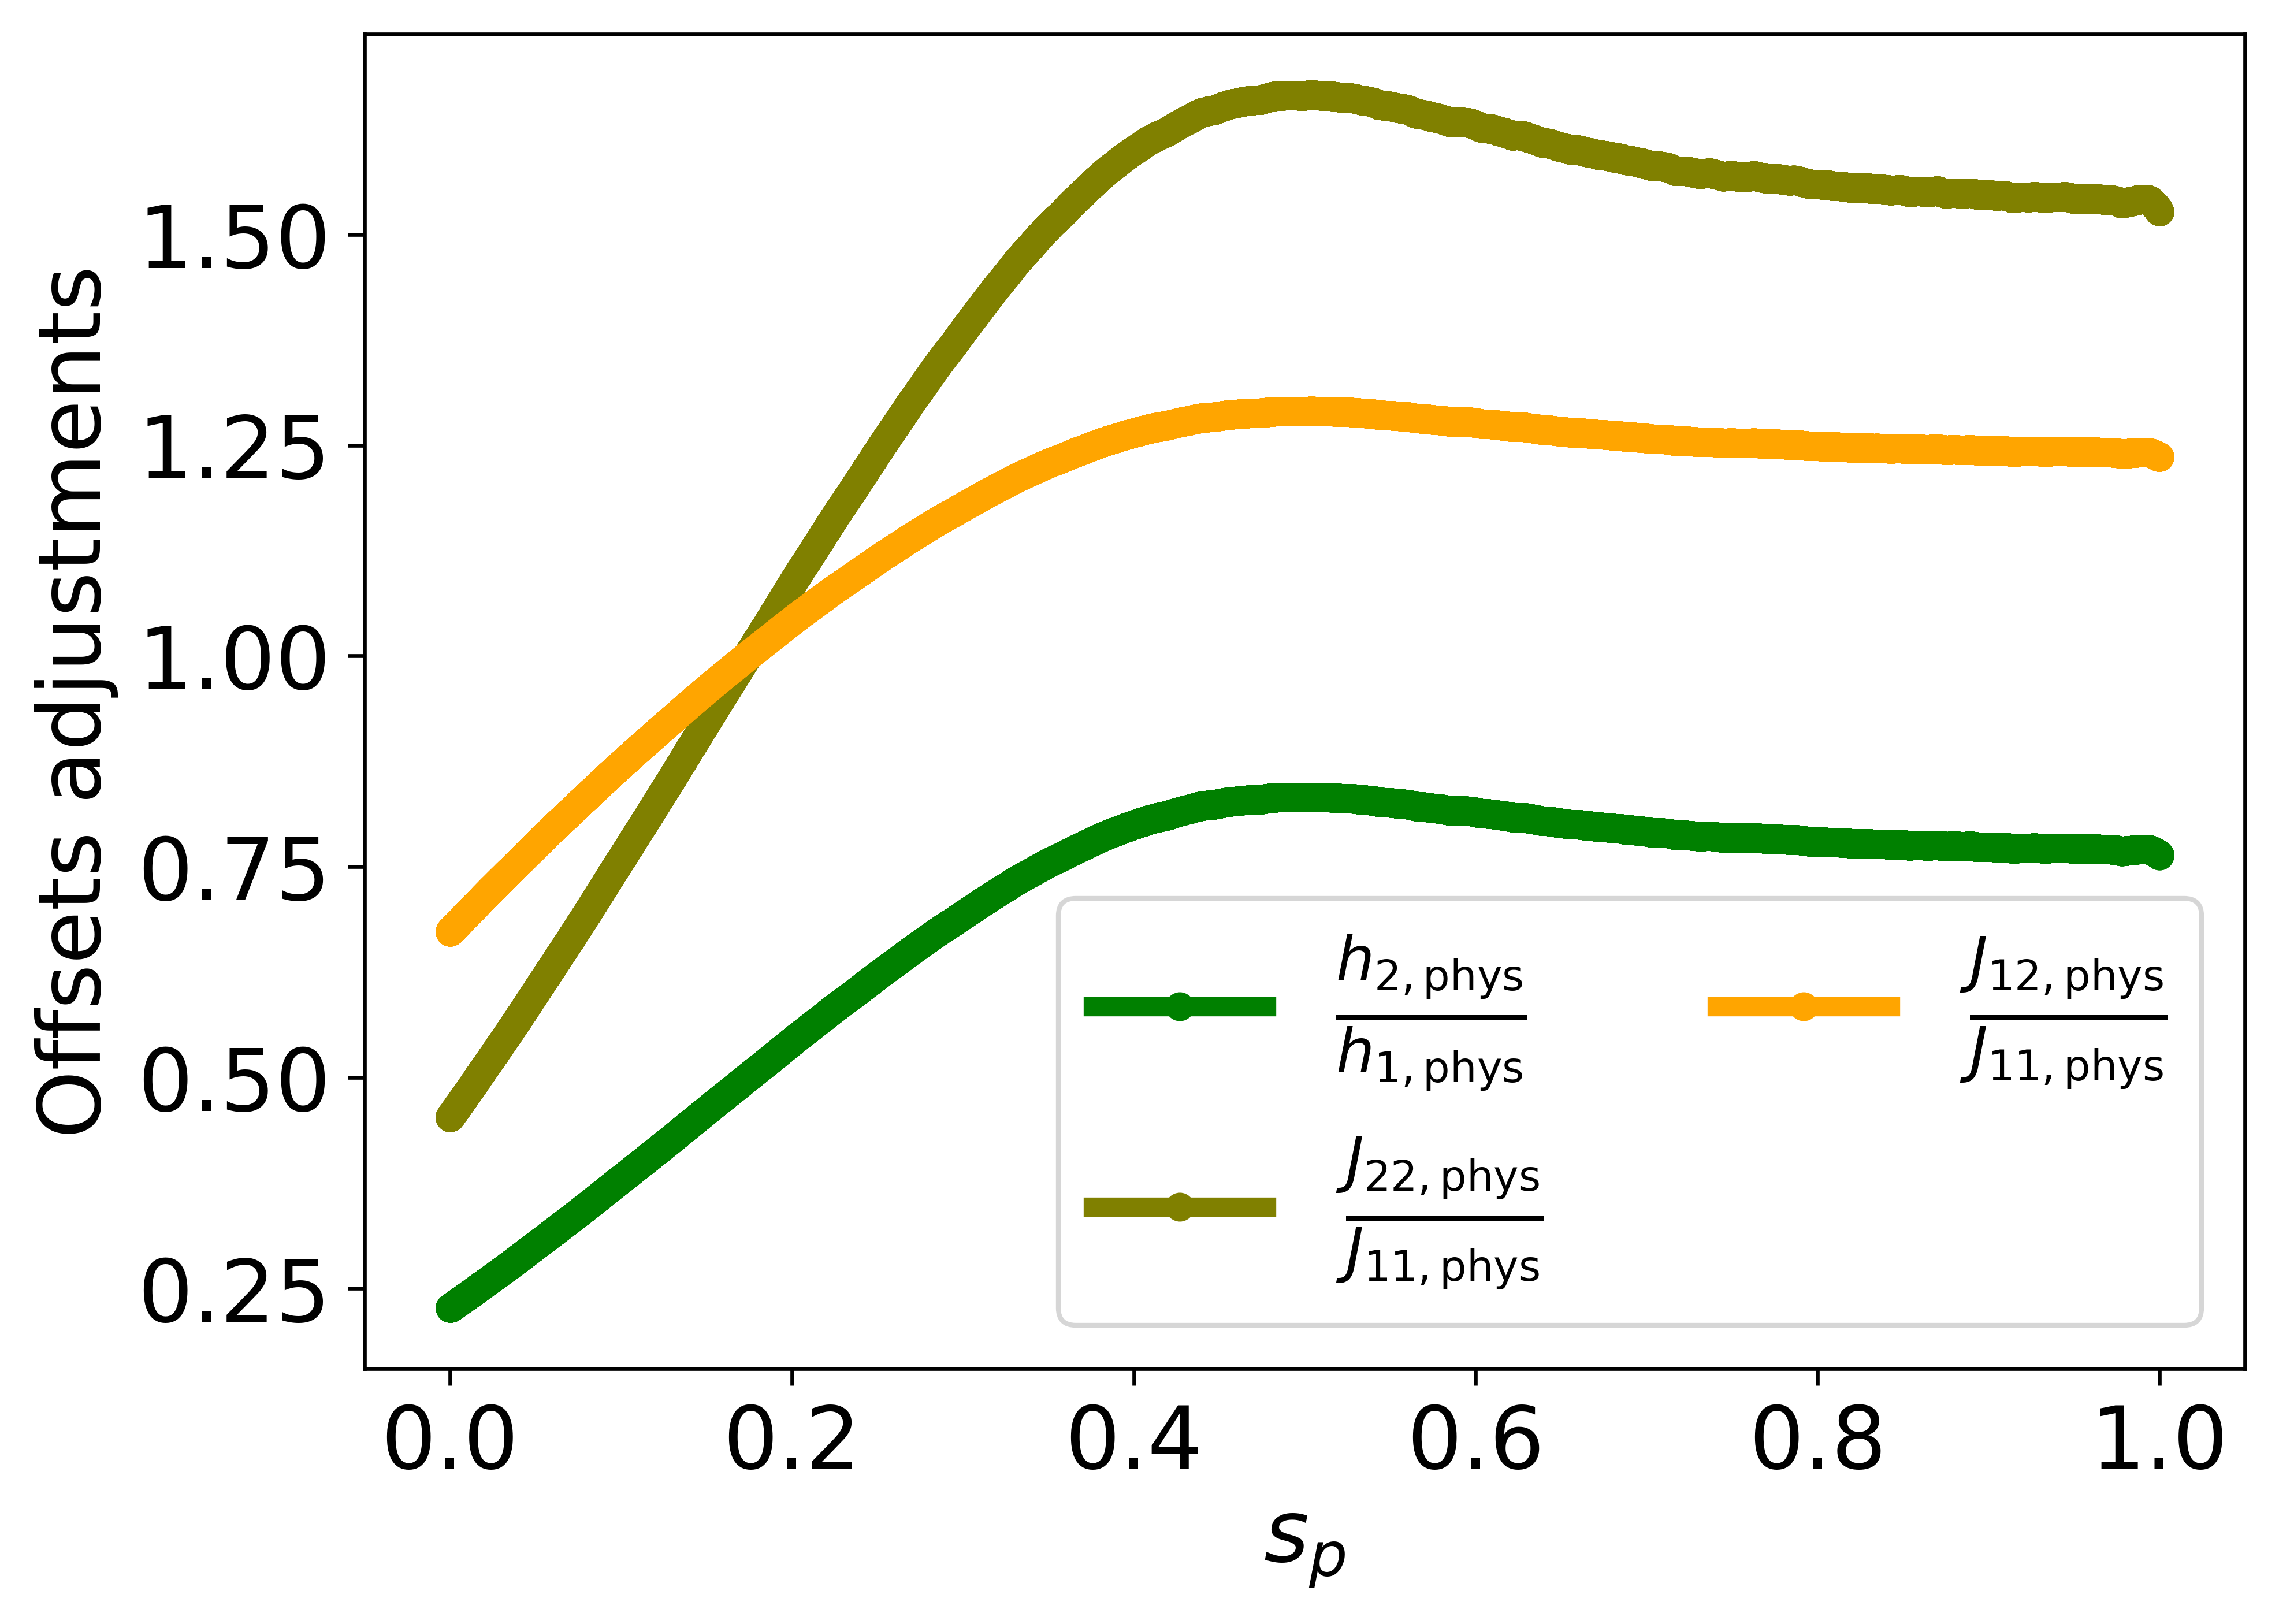

In [15]:
#h value, J_12, J_22

hoffset = np.divide(new_B,2*new_B[indices])
J22 = np.divide(new_B,new_B[indices])
J12 = np.divide(2*new_B,new_B + new_B[indices])
J12_bis = np.sqrt(np.divide(new_B,new_B[indices]))

plt.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))

plt.plot(new_s, hoffset, label=r"$\frac{h_{2, \rm phys}}{h_{1,\rm phys}}$", marker = 'o', color = "green", ms = 5, linewidth = 4)
plt.plot(new_s, J22, label=r"$\frac{J_{22, \rm phys}}{J_{11, \rm phys}}$", marker = 'o', color = "olive", ms = 5,  linewidth = 4)
plt.plot(new_s, J12_bis, label=r"$\frac{J_{12, \rm phys}}{J_{11, \rm phys}}$", marker = 'o', color = "orange", ms = 5, linewidth = 4)
# plt.plot(new_s, J12, label=r"$\frac{J_{12, \rm phys}}{J_{11, \rm phys}}$", marker = 'o', color = "orange", ms = 5, linewidth = 4)
# plt.plot(new_s, J12_bis, label=r"$\frac{J_{12, \rm phys}}{J_{11, \rm phys}}$ bis", marker = 'o', color = "black", ms = 5, linewidth = 4)

plt.legend(ncols = 2)
#ax.set_yscale('log')
plt.xlabel(r'$s_{p}$')
plt.ylabel(r'Offsets adjustments')
# plt.grid()
plt.show()


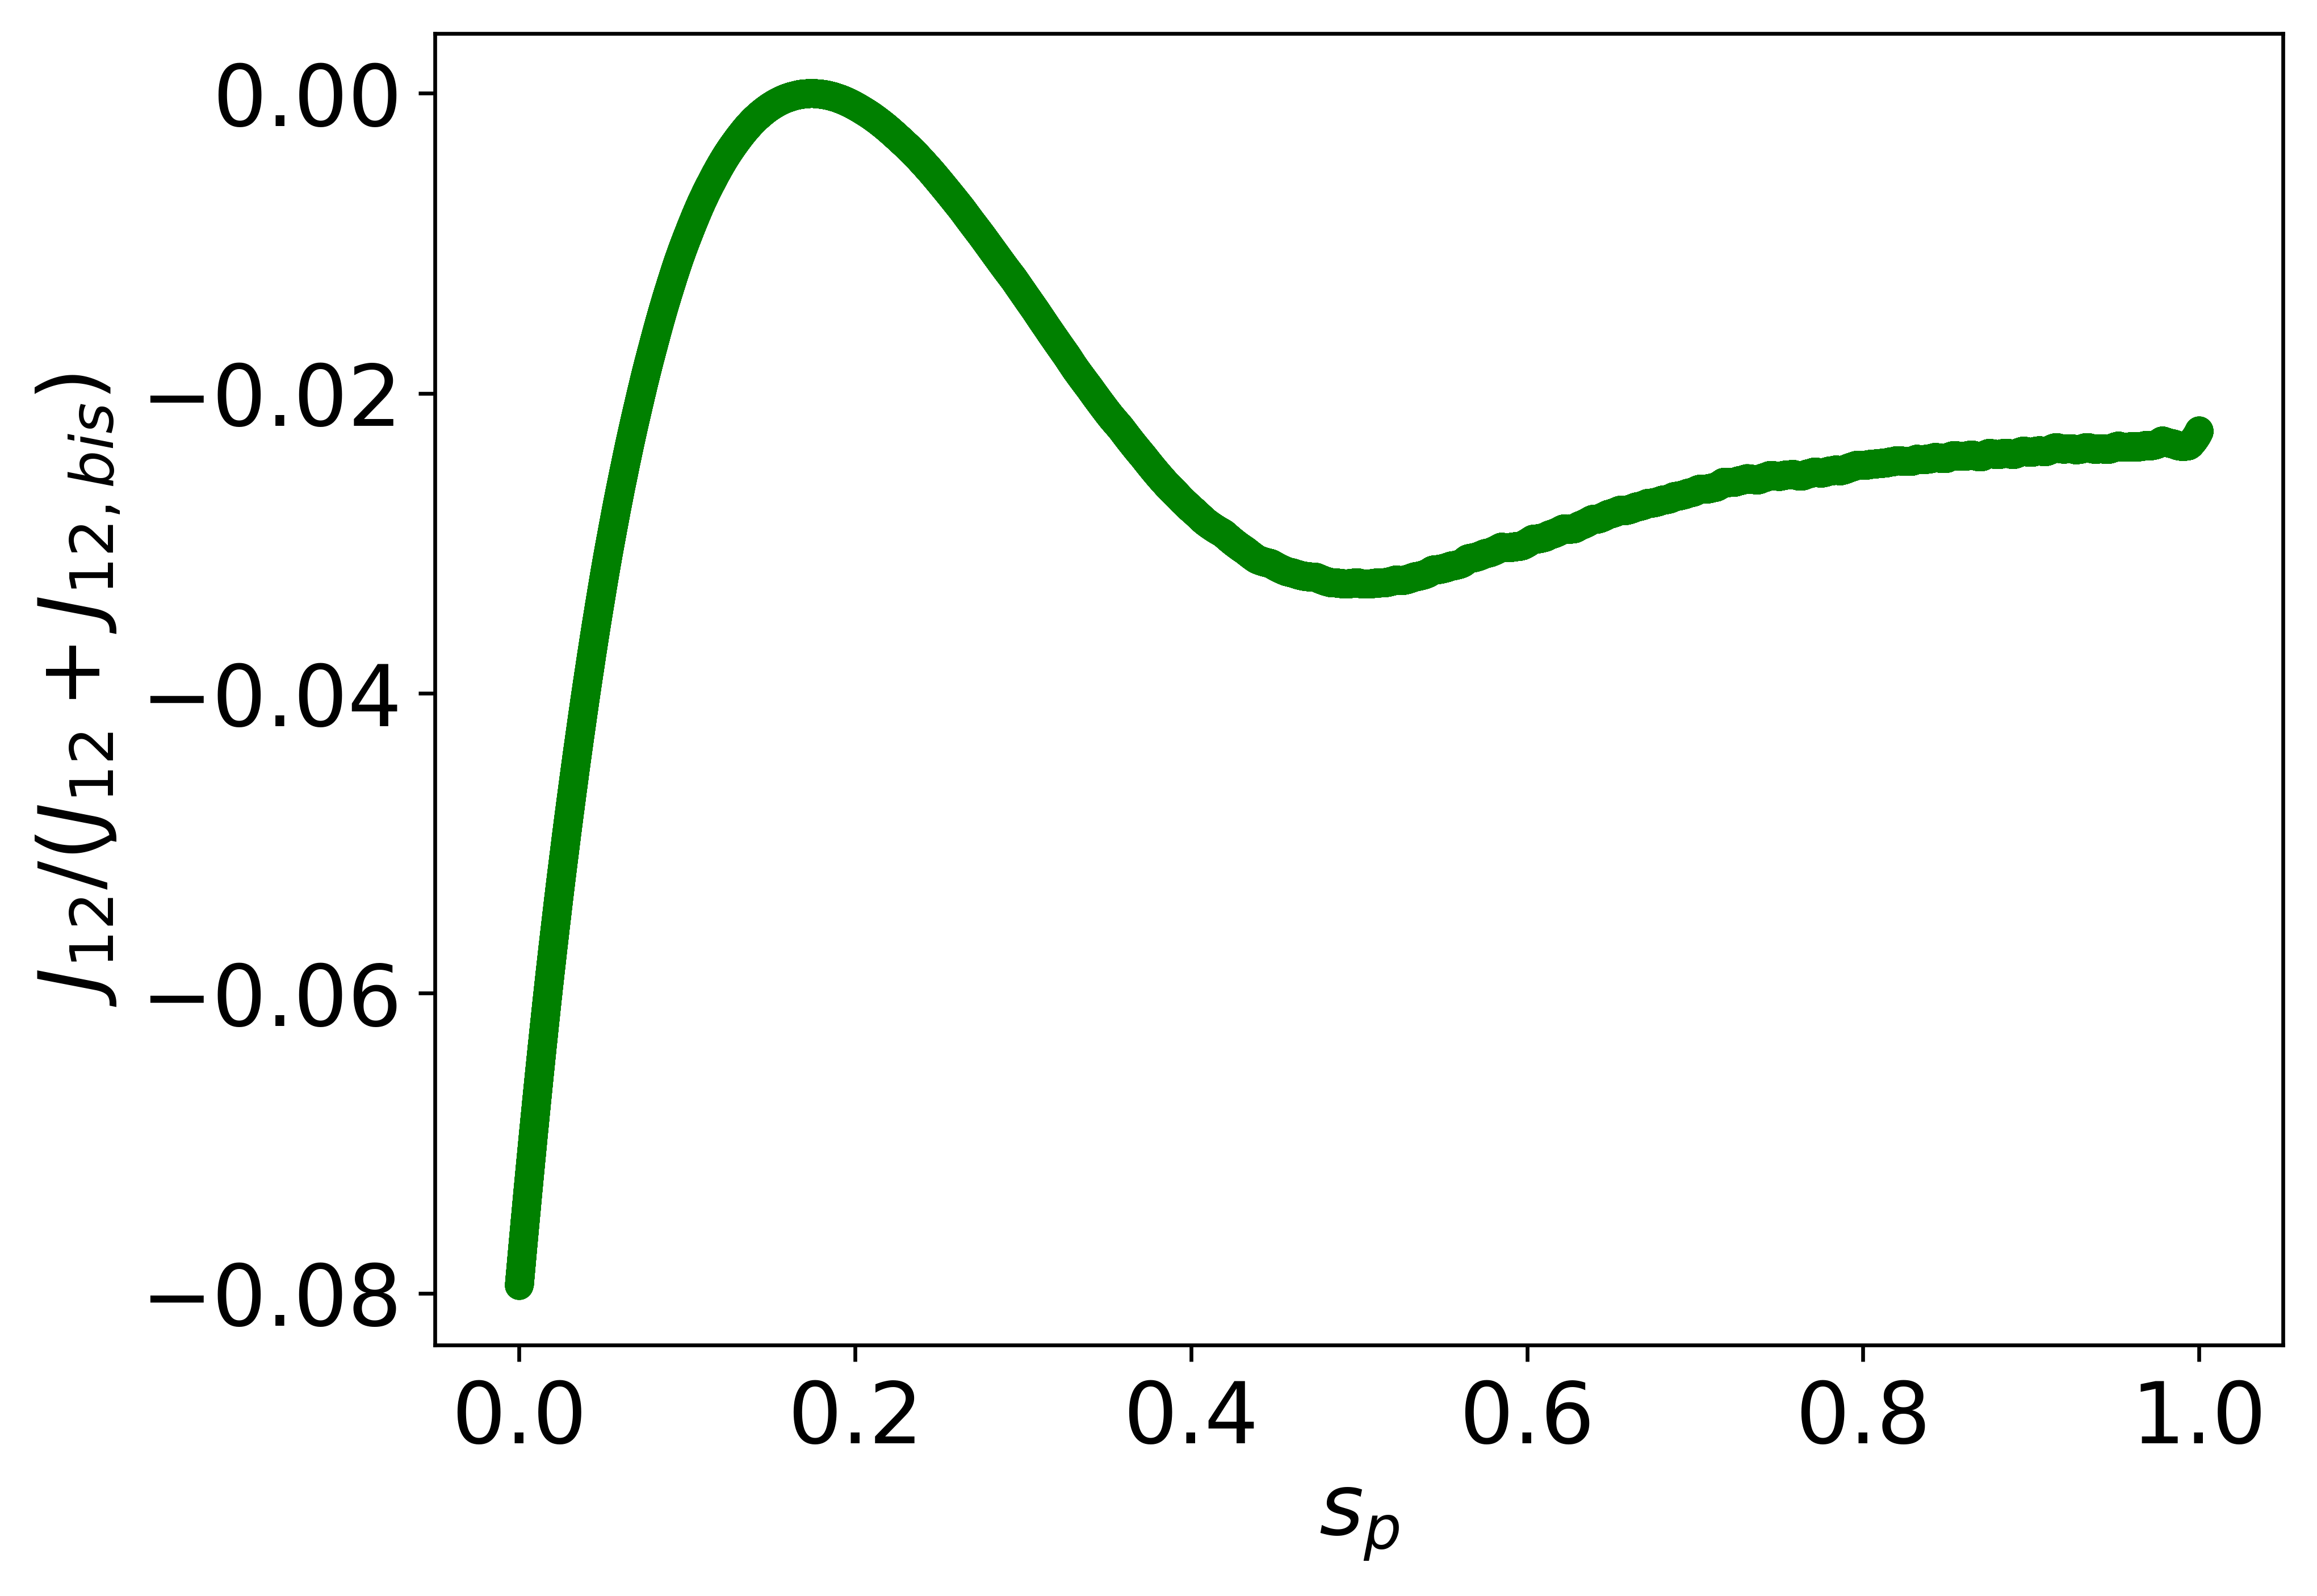

In [16]:

J12 = np.divide(2*new_B,new_B + new_B[indices])
J12_bis = np.sqrt(np.divide(new_B,new_B[indices]))

plt.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(7,5))

plt.plot(new_s, (J12 - J12_bis)/(J12), marker = 'o', color = "green", ms = 5, linewidth = 4)

#ax.set_yscale('log')
plt.xlabel(r'$s_{p}$')
plt.ylabel(r'$J_{12}/(J_{12} + J_{12, bis})$')
# plt.grid()
plt.show()

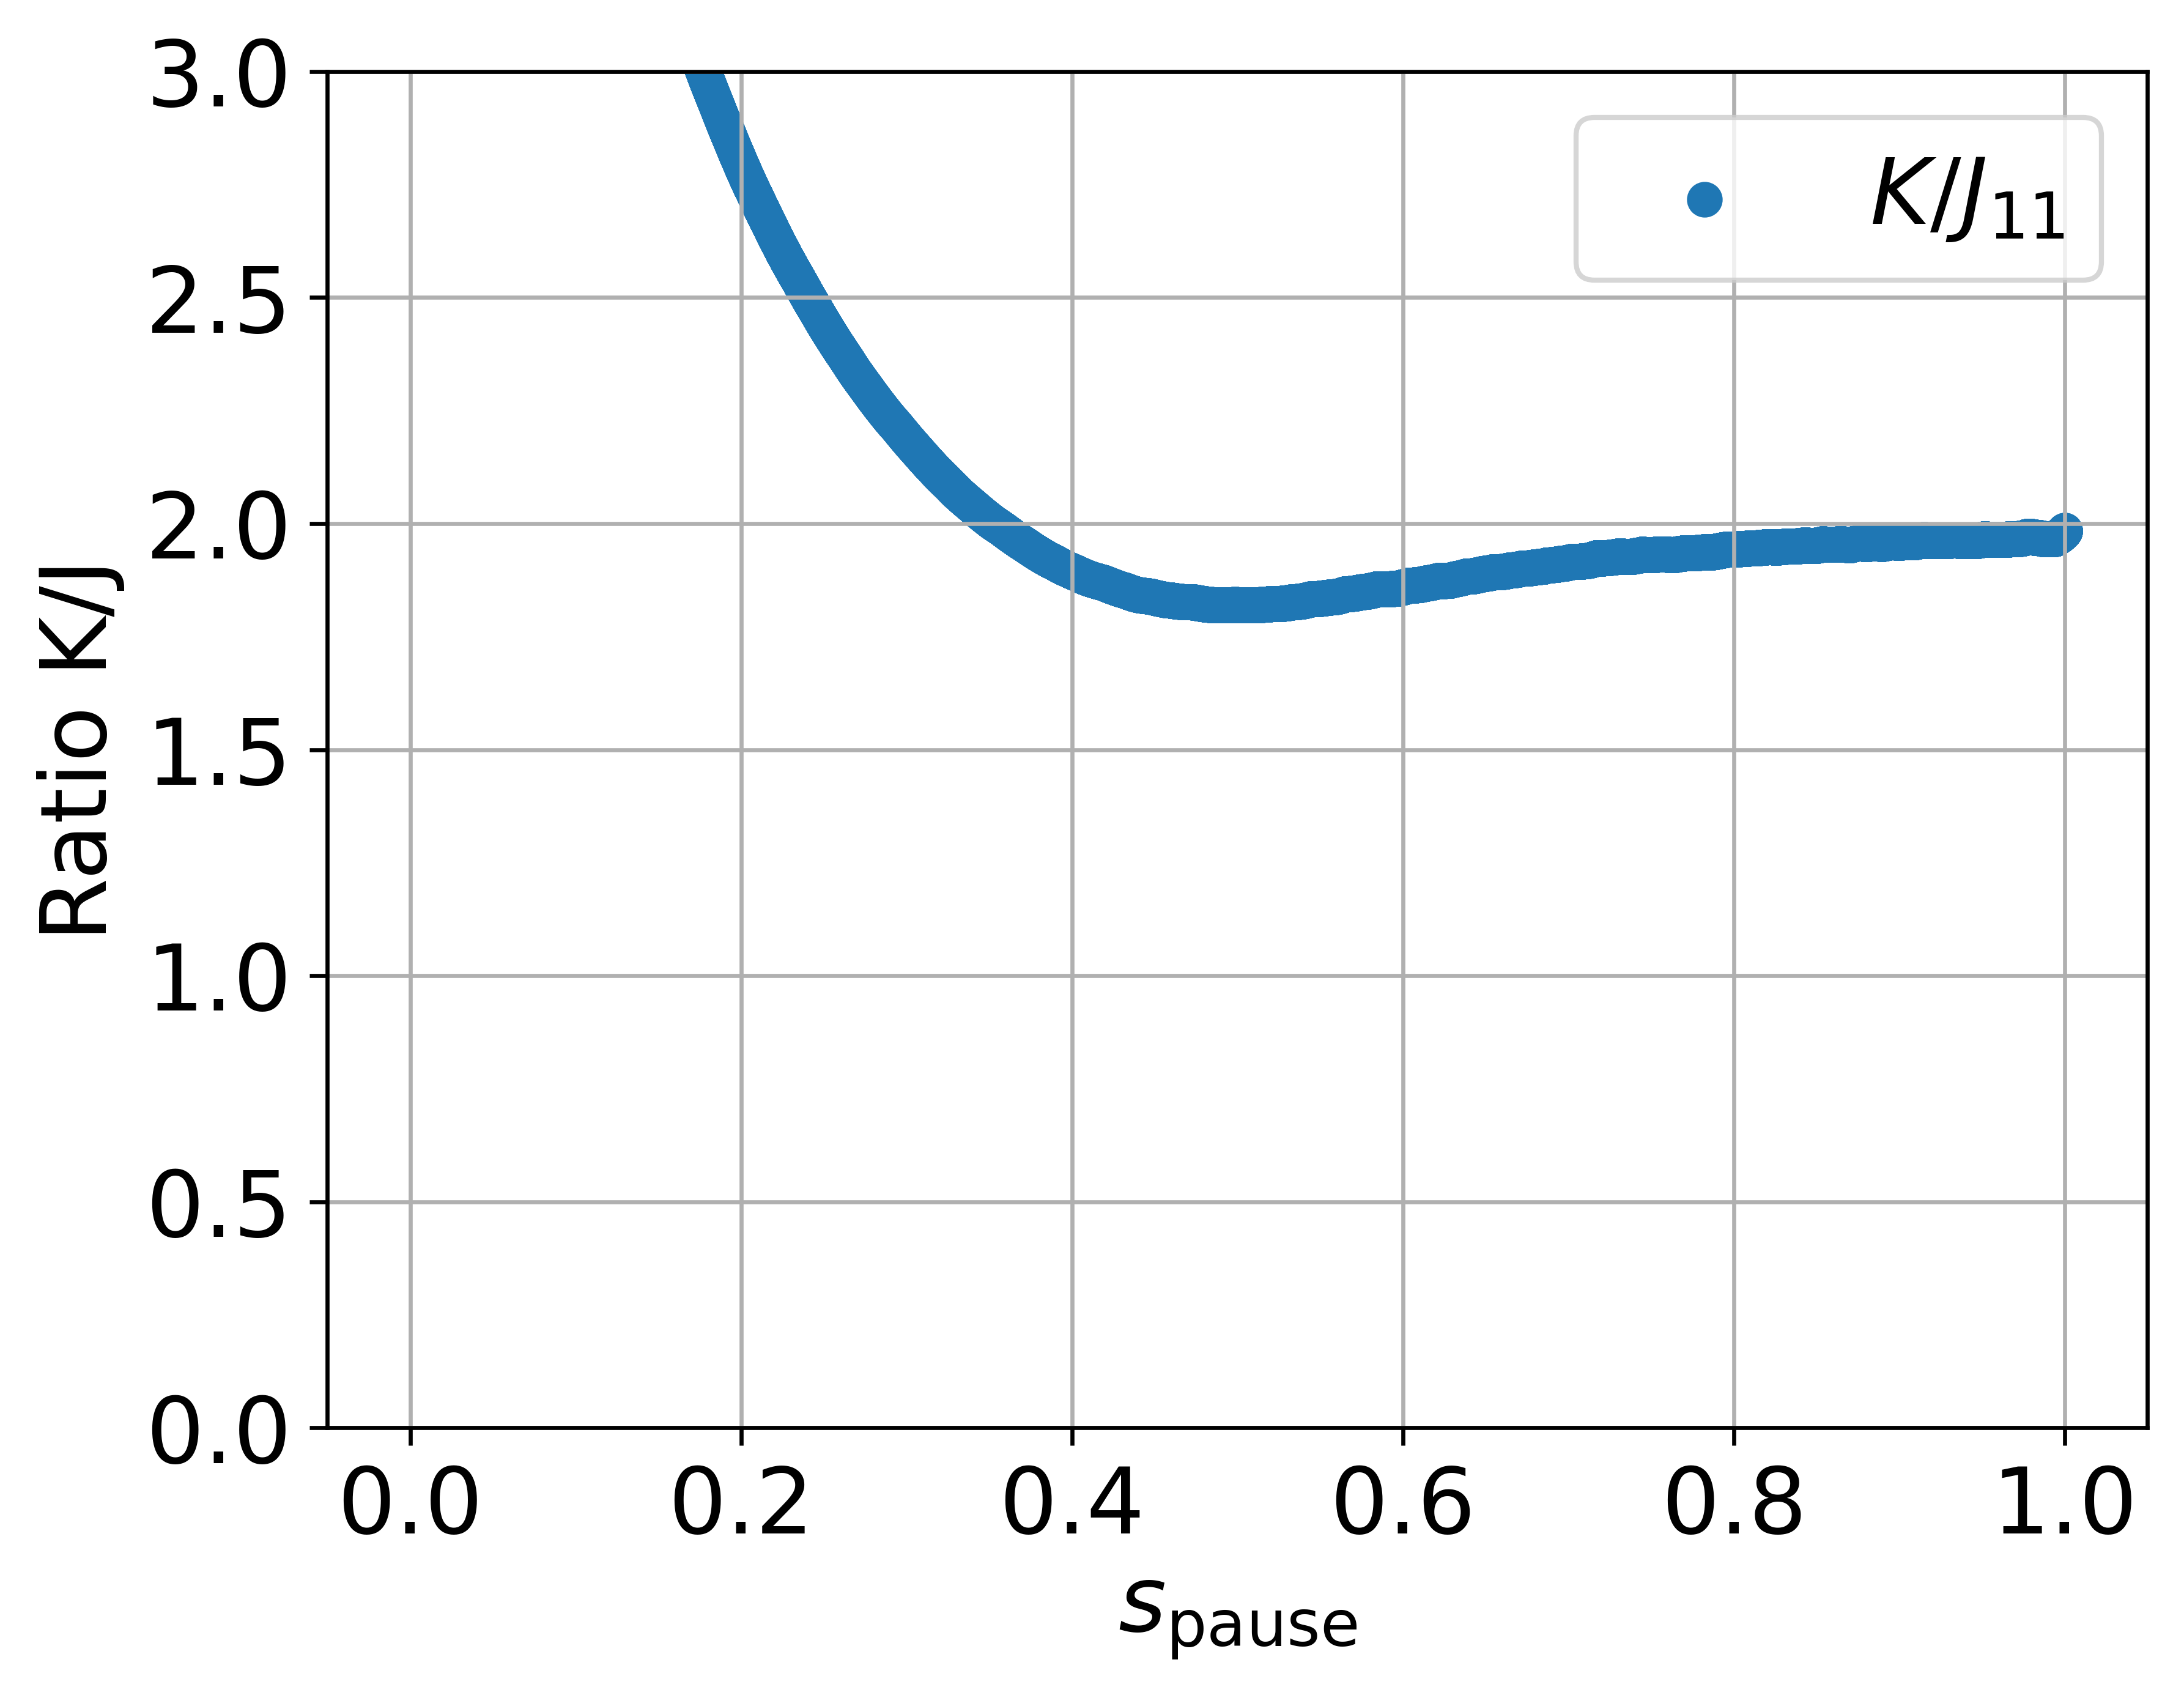

In [17]:
#h value, J_12, J_22

K = 2
Jprime = 0.66

Kcomp = K*new_B[indices]/2
J11_comp = Jprime*new_B/2
KoverJ = np.divide(new_B[indices], new_B)*K/Jprime

fig, ax = plt.subplots()

#ax.scatter(new_s, Kcomp, label=r"$K$")
#ax.scatter(new_s, J11_comp, label=r"$J_{11}$")
ax.scatter(new_s, KoverJ, label=r"$K/J_{11}$")

plt.legend()
#ax.set_yscale('log')
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'Ratio K/J')
plt.ylim([0,3])
plt.grid()
plt.show()


# schedule visualization

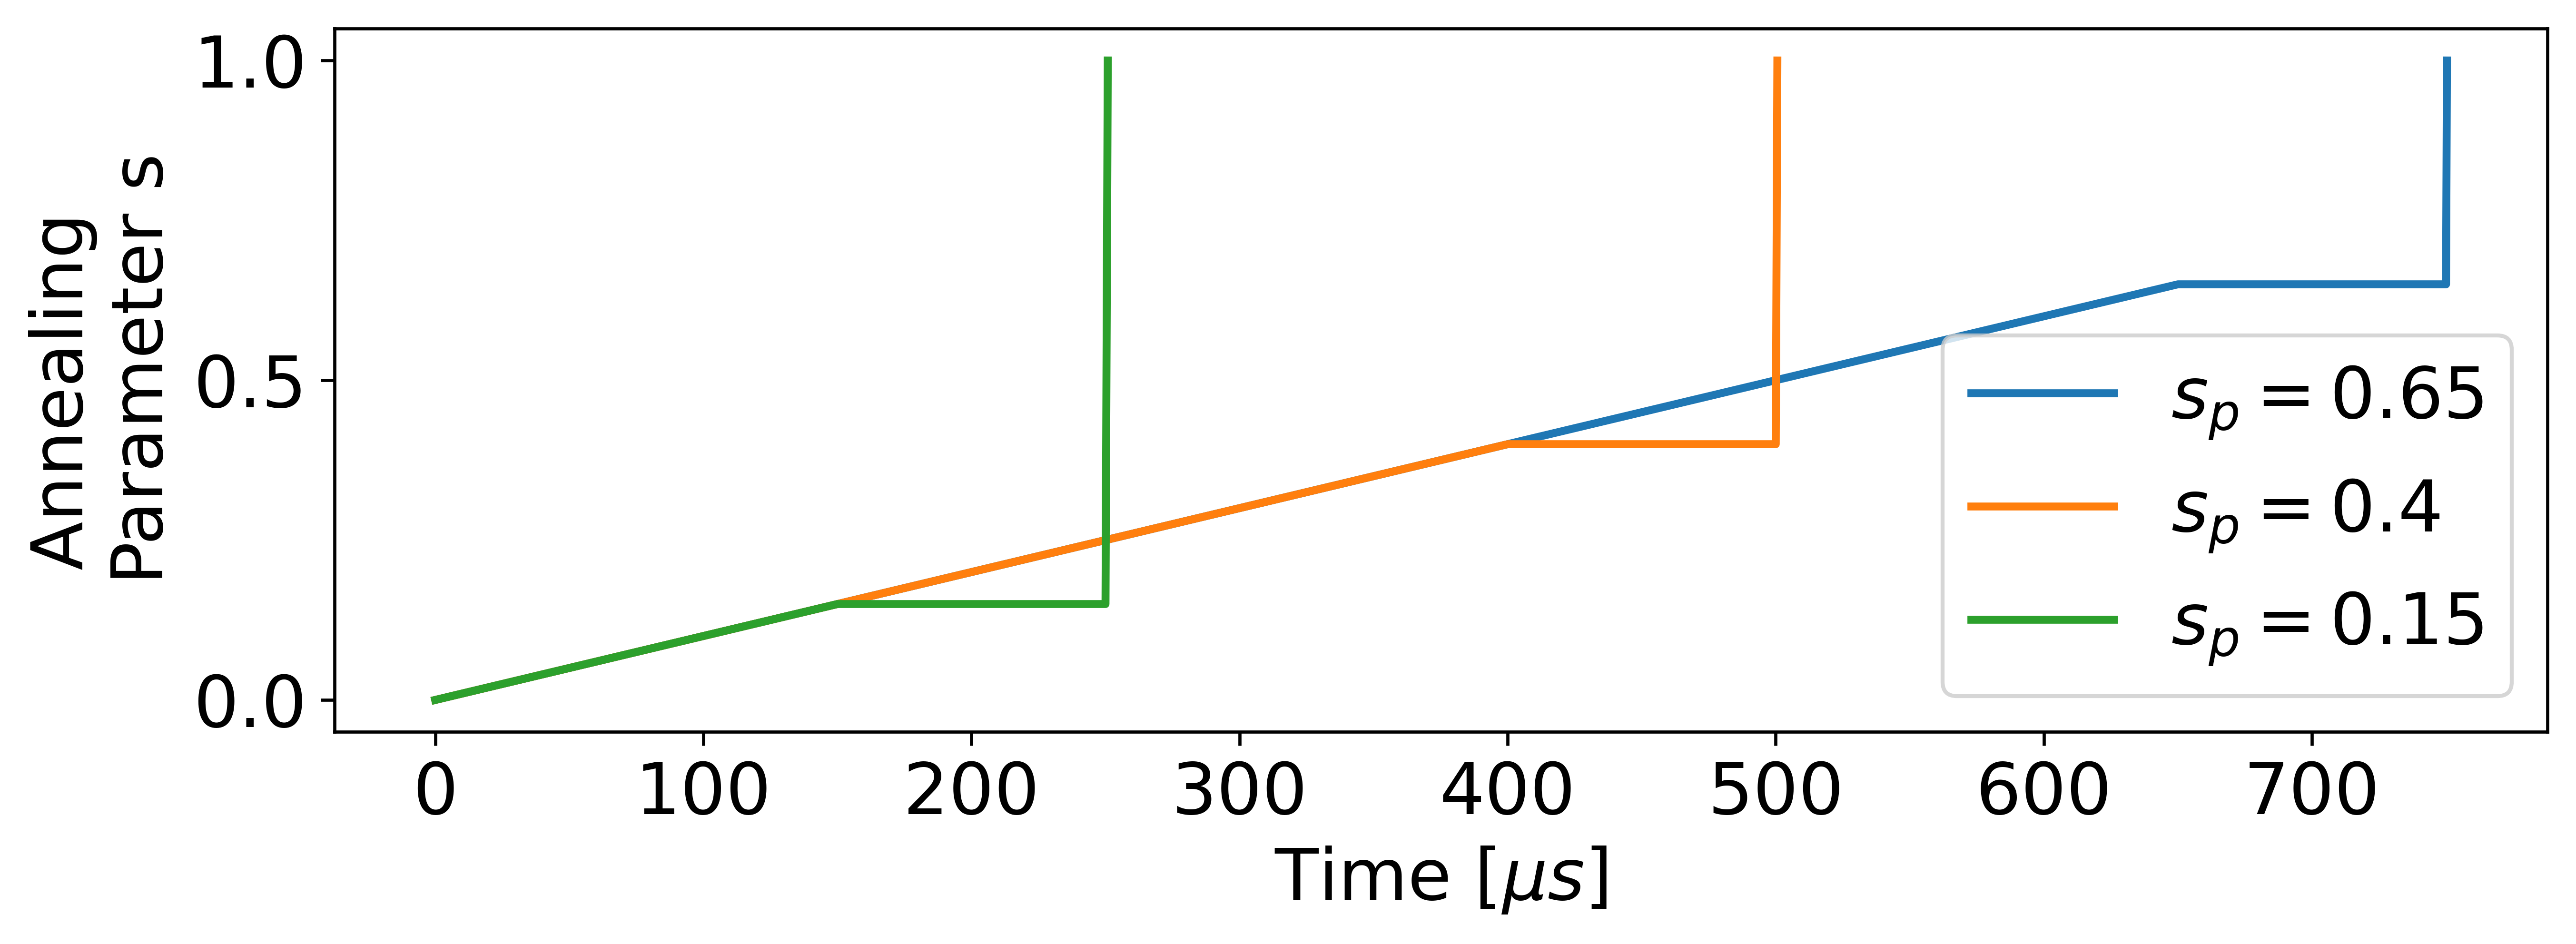

In [18]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(10,3.2))
ax = plt.gca()
# ax.set_title("Schedule Comparison")
for test_sp in [0.65, 0.4, 0.15]:
    # test_sp = 0.9
    basic_schedule = [[0.0, 0.0], [1000*test_sp, test_sp], [100 + 1000*test_sp, test_sp],
                        [100 + 1000*test_sp + (1-test_sp), 1]]
    ax.plot([basic_schedule[i][0] for i in range(len(basic_schedule))],
     [basic_schedule[i][1] for i in range(len(basic_schedule))], 
     label = r'$s_p=$' + str(test_sp), linewidth = 2)
# ax.plot([zx_schedule[i][0] for i in range(len(zx_schedule))], [zx_schedule[i][1] for i in range(len(zx_schedule))], label = 'global X pulse')
# ax.plot([h_schedule[i][0] for i in range(len(h_schedule))], [h_schedule[i][1] for i in range(len(h_schedule))], label = 'h gain schedule')
# plt.legend()
plt.xlabel(r'Time [$\mu s$]')
plt.legend(loc = 'lower right')
plt.ylabel('Annealing \n Parameter s')
# plt.title(r'Pause at $s_p=$' + str(test_sp))
plt.show()

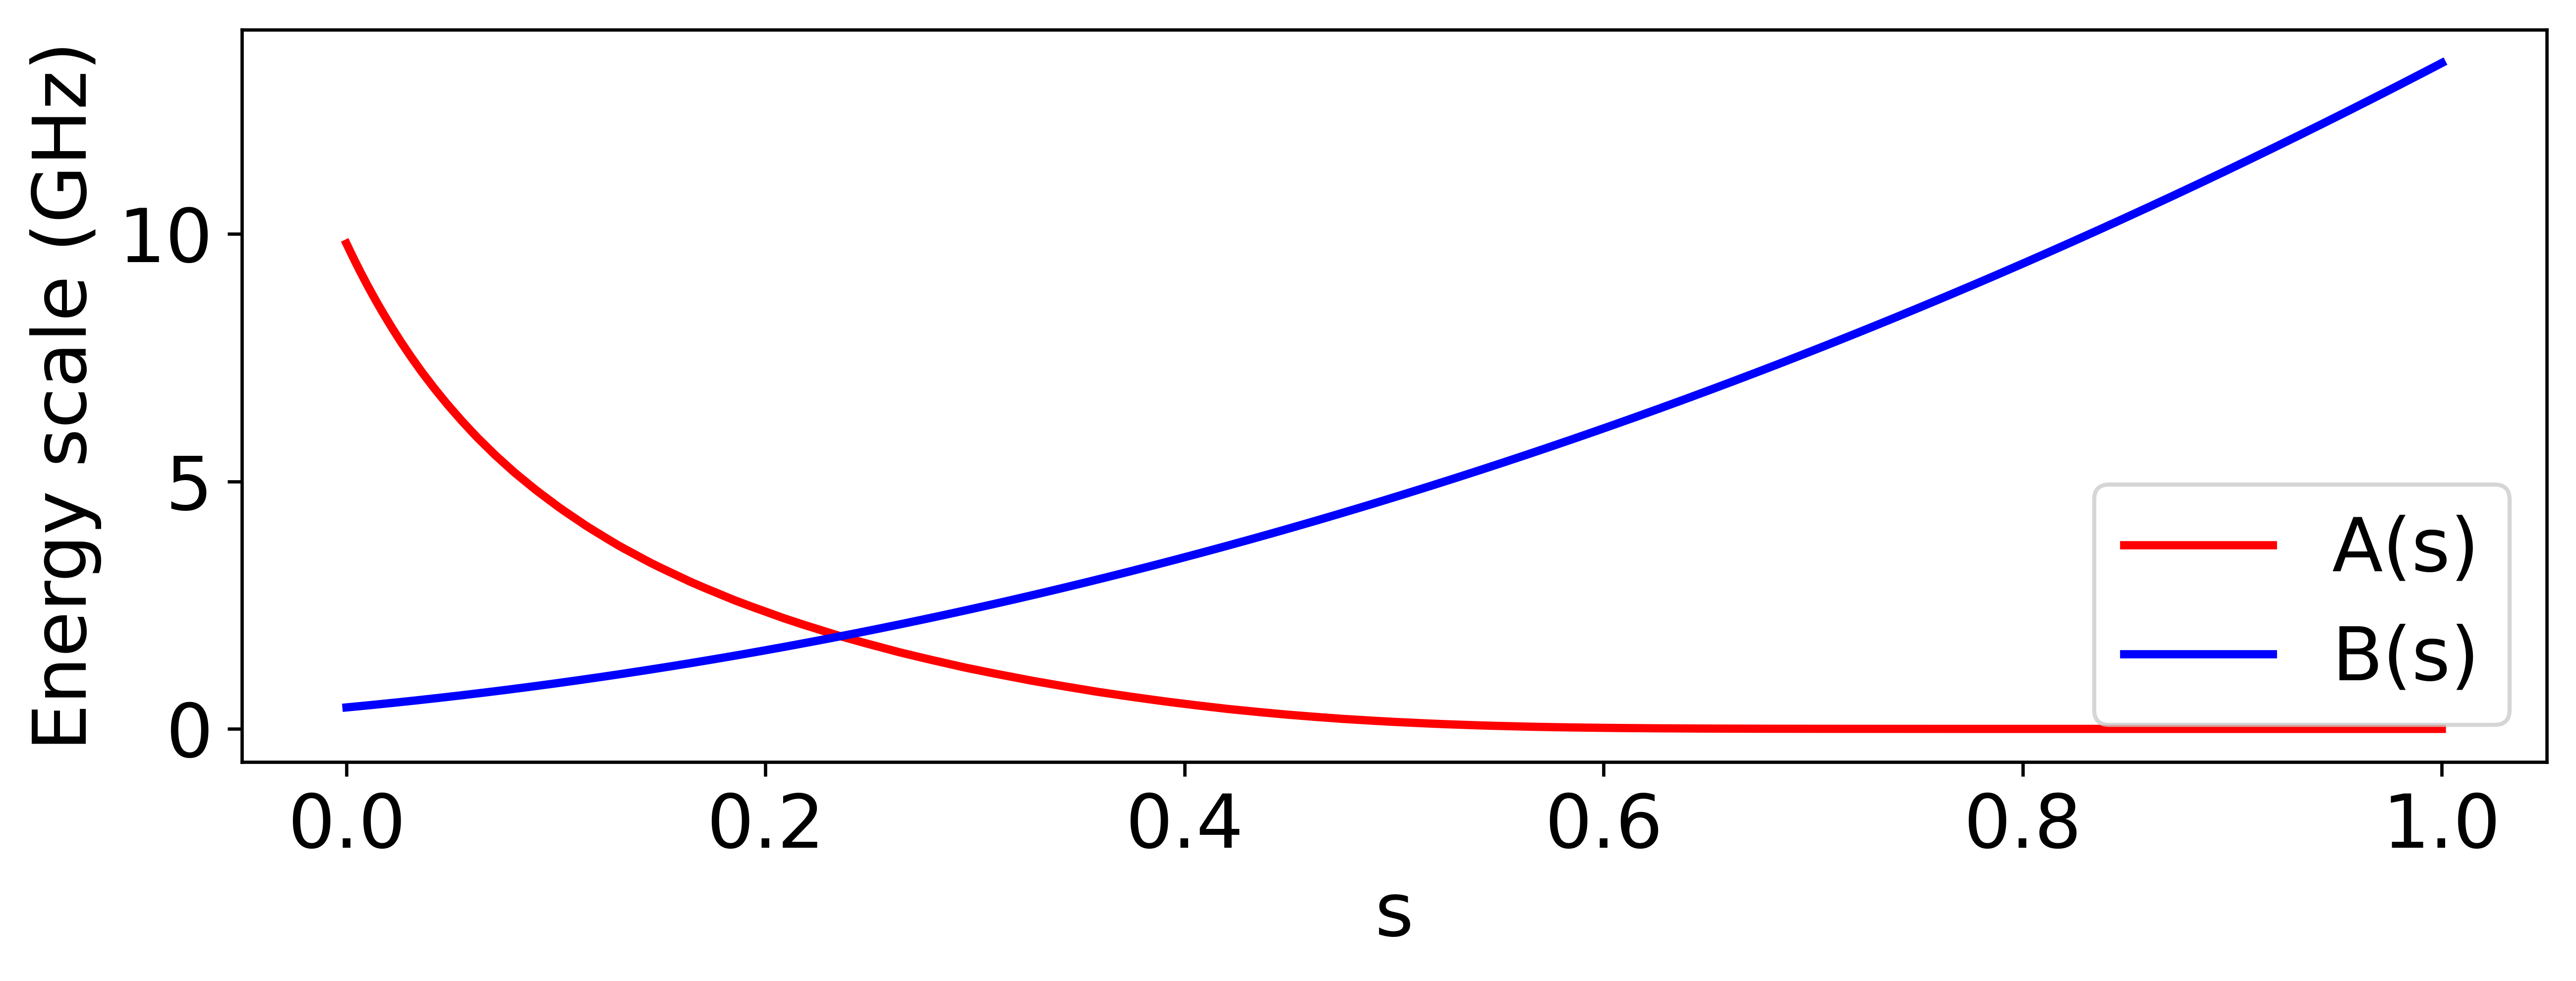

In [19]:
# plot
plt.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(10,3.2))

plt.plot(first_s, first_A, c = 'red', label='A(s)', linewidth = 2)
plt.plot(first_s, first_B, c = 'blue', label='B(s)', linewidth =2)

plt.ylabel('Energy scale (GHz)')
plt.xlabel('s')

plt.legend()

plt.show()

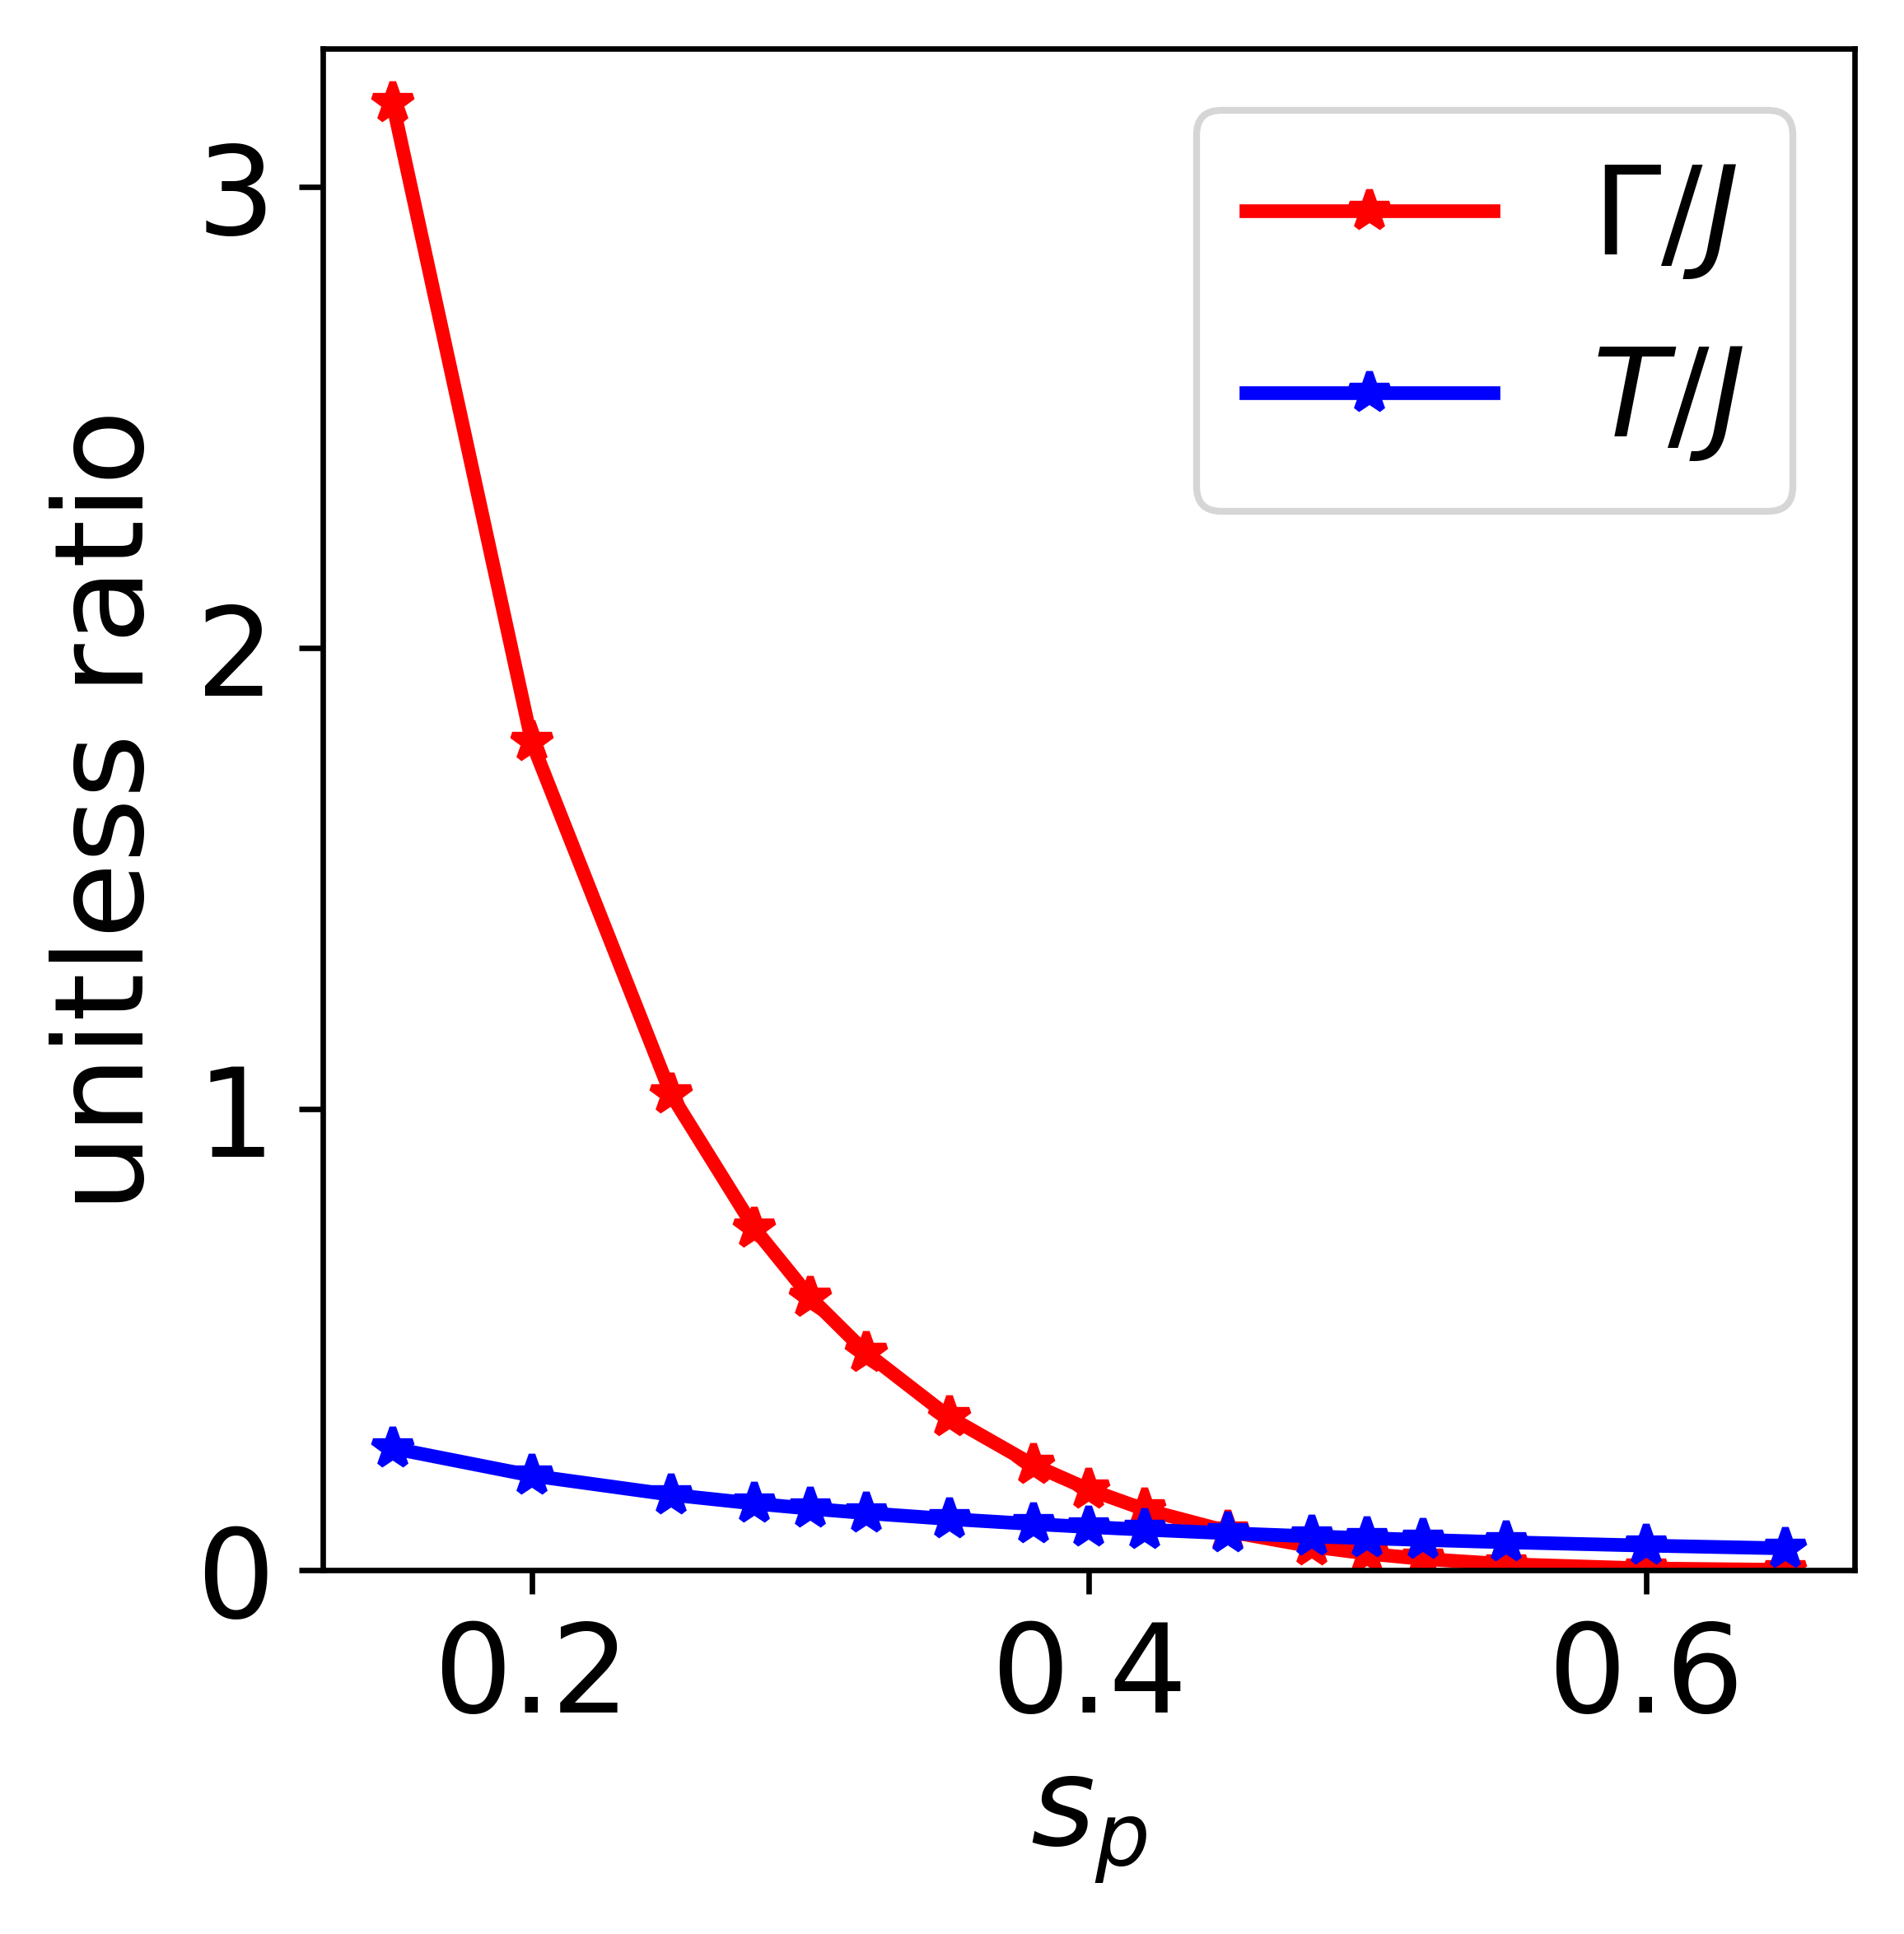

In [20]:
# plot
plt.rcParams['figure.dpi'] = 600
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(4,4))

slist= np.round(sorted(list(np.arange(0.15,0.651,0.05)) + [0.275,0.325,0.375,0.425, 0.475, 0.525]),2)
Jmax = 0.83

#A^2/B
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


#finer s grid
new_s = np.linspace(0,1,num = 100*len(first_s))
new_A = np.interp(new_s, first_s, first_A)
new_B = np.interp(new_s, first_s, first_B)
new_c = np.interp(new_s, first_s, first_c)

yarr_1 = []
yarr_2 = []
boltzman = 1.380649 *10**(-23)
planck = 6.626070 *10**(-34)
temp = 13 * 10**(-3)
for i in range(len(slist)):
    index = find_nearest(new_s, slist[i])
    yarr_1.append(new_A[index] / new_B[index] / Jmax)
    yarr_2.append(boltzman*temp /planck / new_B[index] / 10**9 / Jmax)


plt.plot(slist, yarr_1, '*-', c = 'red', label=r'$\Gamma/J$', linewidth = 2)
plt.plot(slist, yarr_2, '*-', c = 'blue', label=r'$T/J$', linewidth =2)

plt.ylabel('unitless ratio')
plt.xlabel(r'$s_p$')
plt.ylim([0,3.3])

plt.legend()

plt.show()

# phase diagram

In [21]:
slist= np.round(sorted(list(np.arange(0.15,0.651,0.05)) + [0.275,0.325,0.375,0.425, 0.475, 0.525]),2)
hoverjlist = [0, 0.1, 0.17, 0.25, 0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75, 3.88, 4, 4.06, 4.13, 4.25, 4.5]
max_deriv_slocations_apq = np.array( [1.        , 0.43487345, 0.52492643, 0.5099176 , 0.42486757,
        0.32480871, 0.32480871, 0.32480871, 0.28978811, 0.30979988,
        0.28978811, 0.32480871, 0.32480871, 0.37483814, 0.40985874,
        0.3348146 , 0.36483225, 1.        , 0.42486757, 0.28978811])

In [22]:
# find J/T values for each s_c
# first, physical temp in kelvin, planck constant in J*s, and boltzmann constant in J/K
temper = 0.013
planck = 6.626*10**-34
boltzmann = 1.381*10**-23

JoverTlist = []
GammaoverJlist = []
low_error_Gamma = []
high_error_Gamma = []
for sc in max_deriv_slocations_apq:
    
    scindex = find_nearest(new_s, sc)
    #find B but convert from GHz to Hz
    Bval = new_B[scindex] * 10**9
    JoverT = (planck * Bval * 0.83 ) / (boltzmann * temper)
    JoverTlist.append(JoverT)
    
    Aval = new_A[scindex] * 10**9
    GammaoverJ = Aval / (Bval * 0.83)
    GammaoverJlist.append(GammaoverJ)


    sctop = find_nearest(new_s, sc + 0.025)
    val = new_A[sctop] / (new_B[sctop]  * 0.83)
    low_error_Gamma.append(np.abs(GammaoverJ - val))

    scbottom = find_nearest(new_s, sc - 0.025)
    val = new_A[scbottom] / (new_B[scbottom]  * 0.83)
    high_error_Gamma.append(np.abs(GammaoverJ - val))




JoverTlist_norm = JoverTlist/np.max(JoverTlist)
GammaoverJlist_norm = GammaoverJlist/np.max(GammaoverJlist)

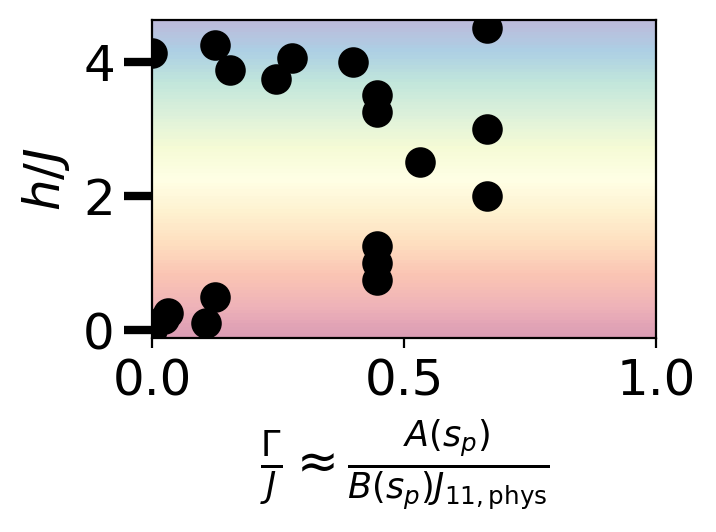

In [23]:
def func3(x, y):
    return y/4.5


# make these smaller to increase the resolution
dx, dy = 0.05, 0.005

x = np.arange(0, 1.01, dx)
# x = np.arange(np.min(GammaoverJlist), np.max(GammaoverJlist), 
#               (np.max(GammaoverJlist)-np.min(GammaoverJlist))/np.max(GammaoverJlist))
y = np.arange(-0.125, 4.625, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

# plt.rcParams.update({'font.size':35})
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(4,3))

extent = np.min(x), 1, np.min(y), np.max(y)
Z2 = Y
plt.contourf(X, Y, Z2, 100, cmap=cmap, alpha=0.4)

ms = 1/(JoverTlist_norm) *10

values_to_exclude = [0,4.13]

# Create new lists excluding the values to exclude
xplot = [val for val in GammaoverJlist if val not in values_to_exclude]
yplot = [hoverjlist[idx] for idx, val in enumerate(GammaoverJlist) if val not in values_to_exclude]


plt.errorbar(
#     max_deriv_slocations_apq, 
    xplot,
    yplot, 
#     xerr = 0.025*np.ones(len(hoverjlist)), 
    fmt = 'o',
    color='black', alpha = 1, markersize = 10, capsize = 5,
#     label= r'$ \frac{h}{k_b} \frac{B(s_c)}{13mK} \approx \frac{J}{T} $'
    label = r'$ s_c $' + r' $ \rm s.t. |\frac {d \langle m \rangle} {ds}| _{\rm max} $'
            )

# for axis in ax.flat:
#     axis.set

# plt.legend(title = r'$ s_c $' + r' $ \rm s.t. |\frac {d \langle m \rangle} {ds}| _{\rm max} $')
# plt.legend()
# plt.grid()
# plt.xlim((0.2,0.6))
# plt.xlabel(r'$s_p$')
plt.xlabel(r'$ \frac {\Gamma}{J} \approx \frac {A(s_p)}{B(s_p)J_{11,\rm{phys}}} $')
plt.ylabel(r'$h/J$')
plt.ylim(-0.125,4.625)
plt.xlim([0, 1])
# plt.xscale('log')
plt.tick_params(axis='y', length=10, width = 3, )

plt.tight_layout()


plt.show()

In [24]:
hoverjlist

[0,
 0.1,
 0.17,
 0.25,
 0.5,
 0.75,
 1,
 1.25,
 2,
 2.5,
 3,
 3.25,
 3.5,
 3.75,
 3.88,
 4,
 4.06,
 4.13,
 4.25,
 4.5]

In [25]:
import matplotlib.colors as mc
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)

Text(0.5, 0, '$ \\frac {\\Gamma}{J} \\approx \\frac {A(s_p)}{B(s_p)J_{11,\\rm{phys}}} $')

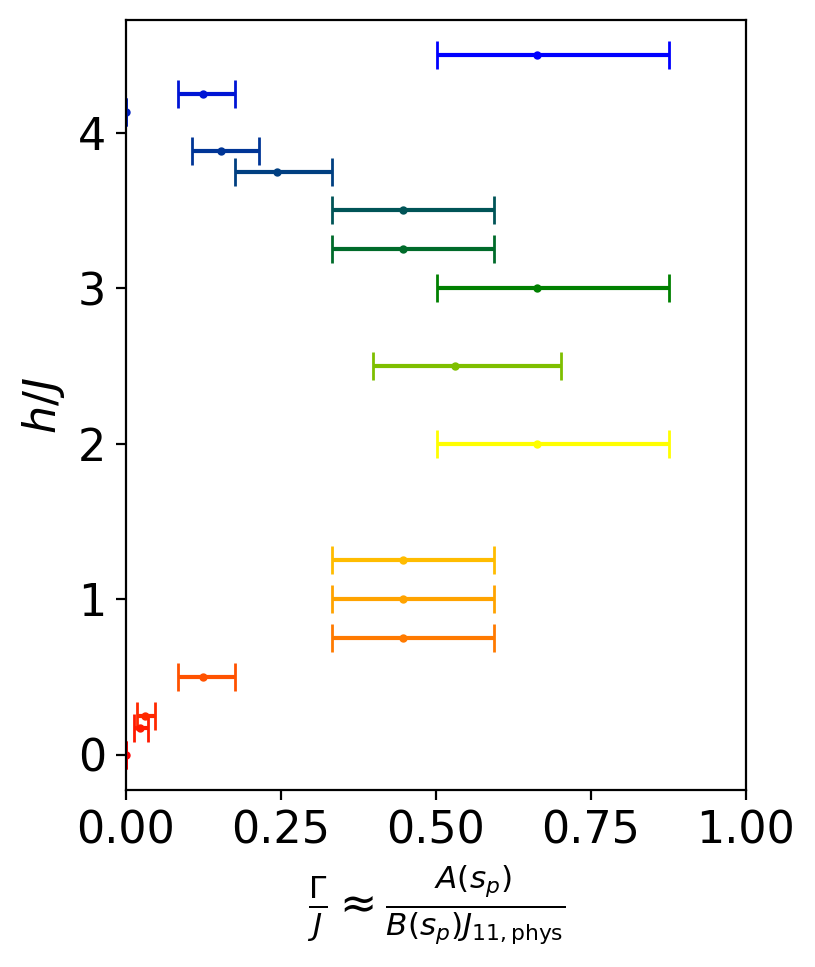

In [27]:
# plt.rcParams.update({'font.size':35})
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':16})
plt.figure(figsize=(4,5))

values_to_exclude = [0.1,4,4.06]

# Create new lists excluding the values to exclude
yplot = [val for val in hoverjlist if val not in values_to_exclude]
xplot = [GammaoverJlist[idx] for idx, val in enumerate(hoverjlist) if val not in values_to_exclude]
xerr_low = [low_error_Gamma[idx] for idx, val in enumerate(hoverjlist) if val not in values_to_exclude]
xerr_up = [high_error_Gamma[idx] for idx, val in enumerate(hoverjlist) if val not in values_to_exclude]
colors = [cmap(val/4.5) for val in hoverjlist if val not in values_to_exclude]

for m in range(len(colors)):
    plt.errorbar(
        xplot[m], 
        yplot[m],
        xerr = [[xerr_low[m]], [xerr_up[m]]], 
        fmt = 'o',
        color=colors[m], alpha = 1, markersize = 2, capsize = 5)
plt.xlim([0, 1])
plt.ylabel(r'$h/J$')
plt.xlabel(r'$ \frac {\Gamma}{J} \approx \frac {A(s_p)}{B(s_p)J_{11,\rm{phys}}} $')

<ErrorbarContainer object of 3 artists>

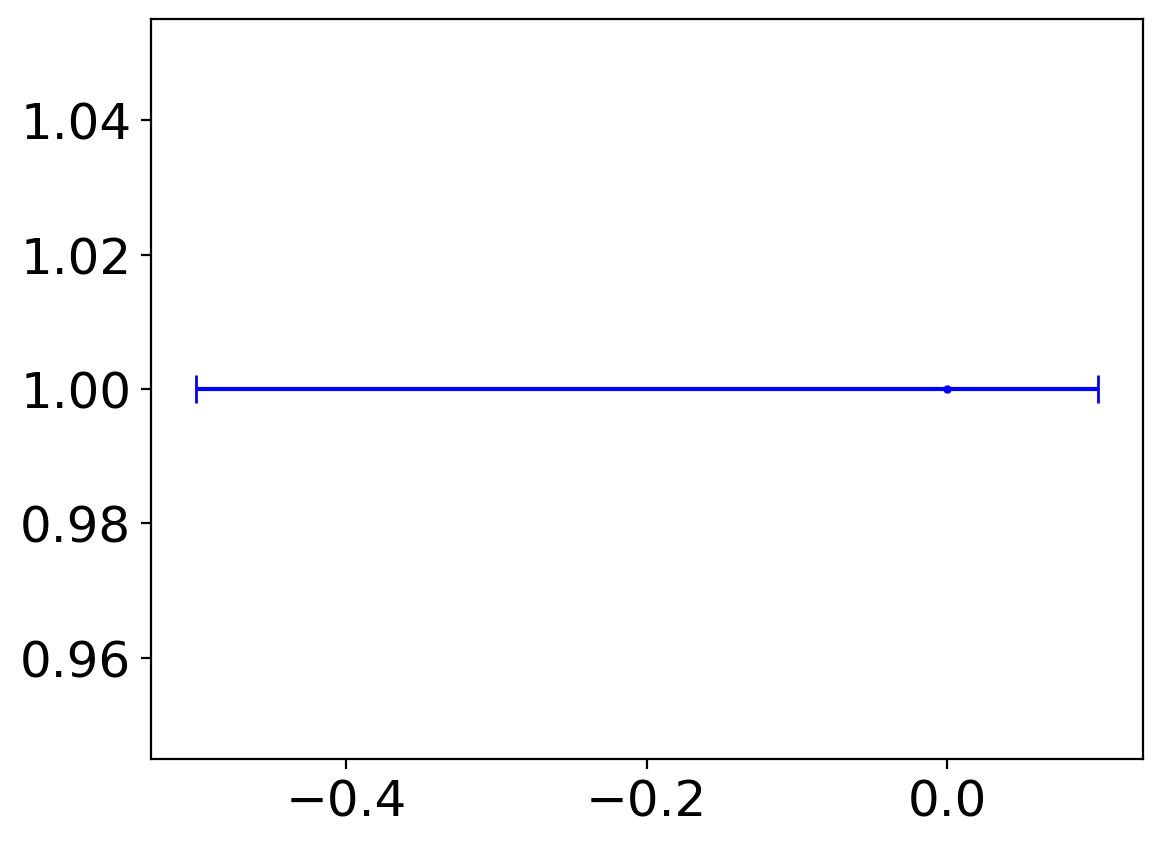

In [76]:
plt.errorbar(
        0, 
        1,
        xerr = [[0.5], [0.1]], 
        fmt = 'o',
        color='b', alpha = 1, markersize = 2, capsize = 5)